# COMM055 - MLDM - Mean Squares 
## Wine Dataset

Danylo Kovalenko
URN: 6413526<br>
Emily Gould 
URN: 6660230<br>
Jamie Dance
URN: 6661320<br>
Jenna Wilkes
URN: 6662507<br>
William Hemsley
URN: 6414699<br>

### ----------------------------------------------------------------------------------------------------------------------------------

## Table of Contents

* [Introduction](#intro)
* [Importing Packages and Datasets](#imports)
* [Exploratory Data Analysis](#eda)
* [Pre-Processing](#pre_processing)
* [Models](#models)
* [Tuning Hyperparameters](#hypertuning)
* [Training With Best Parameters](#best_params)
* [ROC Curves and Other Comparisons](#comparisons)

## Introduction <a class="anchor" id="intro"></a>

The following dataset provided by the UCI Machine Learning Repository contains details on close to 6500 different wines and their associated quality. The aim of the following experimentation is to create a highly accurate machine learning model to predict wine quality, which can generalise well to new data. The following data is sourced from 2 separate CSV files: *'winequality-white.csv'* and *'winequality-red.csv'* for **white wine** and **red wine data** respectively. The combined dataset is highly unbalanced, with many more 'average' wines than poor or excellent wines.

**Wine Dataset Source:**
https://archive.ics.uci.edu/ml/datasets/Wine%2BQuality

## Importing Packages and Datasets <a class="anchor" id="imports"></a>

In [1]:
# # Google Colab Data Loading
# # Import the dataset from the online source straight into google colab
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

The first step is to import all the necessary packages and to load the datasets.

In [2]:
# Ignore warnings
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings('ignore')

# Reading and manipulating the datasets
import pandas as pd
import numpy as np

# Visualisations
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import export_graphviz
import graphviz 
from sklearn.tree import export_text, plot_tree

# Machine learning models
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Train/test splitting
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.model_selection import train_test_split

# Scoring
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report, auc, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Miscellaneous libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from collections import Counter
import traceback
import sys
from IPython import display
from scipy import stats

In [3]:
# Import the datasets
whitewine = pd.read_csv('winequality-white.csv', sep=';')
redwine = pd.read_csv('winequality-red.csv', sep=';')

## Exploratory Data Analysis <a class="anchor" id="eda"></a>

We can briefly look at the first rows of each dataset as well as to print out the dimensions.

In [4]:
# Look inside the white wine dataset
print(whitewine.shape)
whitewine.head()

(4898, 12)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [5]:
# Look inside the red wine dataset
print(redwine.shape)
redwine.head()

(1599, 12)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

#### Joining Red and White Wine Datasets
Create a *colour* attribute for the two wine datasets. The two datasets have identical columns so one can just be concatenated with another. 

In [6]:
# Create an extra column for colour in the white wine dataset
whitewine['colour'] = 'white'
whitewine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality colour  
0      8.8        6  white  
1      9.5        6  white  
2     10.1        6  white  
3      9.9        6  white  
4      9.9        6  white

In [7]:
# Create an extra column for colour in the red wine dataset
redwine['colour'] = 'red'
redwine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality colour  
0      9.4        5    red  
1      9.8        5    red  
2      9.8        5    red  
3      9.8        6    red  
4      9.4        5    red

In [8]:
# Combine the Datasets
wine = pd.concat([redwine, whitewine])
wine = wine.reset_index(drop=True) # reindex
wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality colour  
0         9.4        5    red  
1         9.8        5    red  
2         9.8        5    red  
3         9.8        6    red  
4         9.4        5    red  
...       ...      ...    ...  
6492     11.2        6  white  
6493      9.6        5  white  
6494      9.4        6  white  
6495     12.8        7  white  
6496     11.8        6  white  

[6497 rows x 13 columns]

We can see the number of instances for each colour:

In [9]:
# Check the number of instances for each colour
wine.groupby('colour').size()

colour
red      1599
white    4898
dtype: int64

#### Checking for Null Values:

Null values can complecate working with data. However, the resulting dataset does not have any missing values:

In [10]:
# Check for null values
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
colour                  0
dtype: int64

##### Checking Dimensions of Dataset:

Let's print out the dimensions of the merged dataset:

In [11]:
# Output the dimensions
wine.shape

(6497, 13)

There are 6497 rows and 13 attributes.

#### Univariate Analysis

**Univariate analysis** describes the distribution of single variables, including meausures of central tendency (mean, median, mode), measures of spread (variance, standard deviation) and measures of dispersion and variability (range, inter-quartile range).

In [12]:
# Output some basic statistics
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

Some values seem to be quite spread out. For example, the minimum fixed axidity is 3.8, whereas the maximum is 15.9. This could suggest that there are some outliers unless the difference is caused by different quality.

We can check how many instances there are for each quality:

In [13]:
# Check the number of instances for each quality
wine.groupby('quality').size()

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
dtype: int64

Some values are very underrepresented. There are only 5 instances of top quality wine. Qualities 1, 2 and 10 are absent. Most instances are labeled as mediocre - 5, 6 or 7. 

##### Distribution of Wine Quality:

We can plot the distribution of wine by quality to visualise this information:

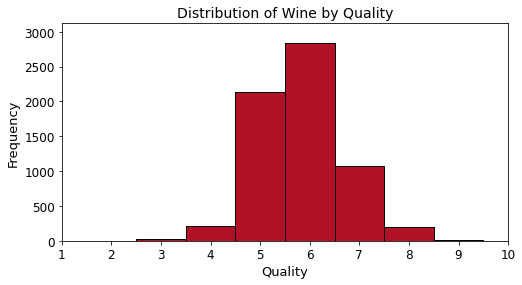

In [14]:
# Plot the distribution by quality
quality = range(1, 11)

histogram = Counter(wine.quality)

plt.figure(figsize=(8, 4))
plt.bar([x for x in histogram.keys()], 
        histogram.values(),                 
        1,                                
        edgecolor=(0,0,0),
        color = '#b11226')

plt.axis([min(quality), len(quality), 0, max(histogram.values()) + max(histogram.values())/10])

plt.xticks([i for i in quality], fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Quality", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.title("Distribution of Wine by Quality", fontsize=14)

plt.show()

We can see that the dataset is unbalanced and that there are only examples of wine of quality in the interval [3,9]. The data can be said to be roughly *normally distributed*, with few examples of extremes and the majority of the data centred around wine quality *6*. The wine quality is the output variable.

##### Histograms for Wine Features:

We can also plot histograms for each feature to see the distributions. Many input feautres seem to be normally distributed. Residual sugar, chlorids and total sulfur dioxide seem to be the exceptions.

In [15]:
# Plot the distribution for each feature
figure = wine.hist(figsize=(25,15), color='#b11226', edgecolor='black', grid=False)

for ax in figure.flatten(): 
    ax.set_xlabel("Value", size=13)
    ax.set_ylabel("Frequency", size=13)

plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.2)
plt.show()

Values can be grouped by quality:

In [16]:
# Plot the distribution for each feature by quality
fig, axes = plt.subplots(4, 3, figsize=(25, 15))
r = 0
c = 0

for i in wine.columns:
    if i != 'colour':
        plot = sns.histplot(ax = axes[r, c], data = wine[i], x=wine[i], hue=wine.quality, palette='Set1');
        plot.set_title(f"'{i.title()}' Histogram - Different Qualities", fontsize=15)
        plot.set_ylabel("Frequency", fontsize=13)
        plot.set_xlabel(i.title(), fontsize=13)
        if c != 2:
            c += 1
        else: 
            c = 0
            r +=1

plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.2)
plt.show()

Or by colour:

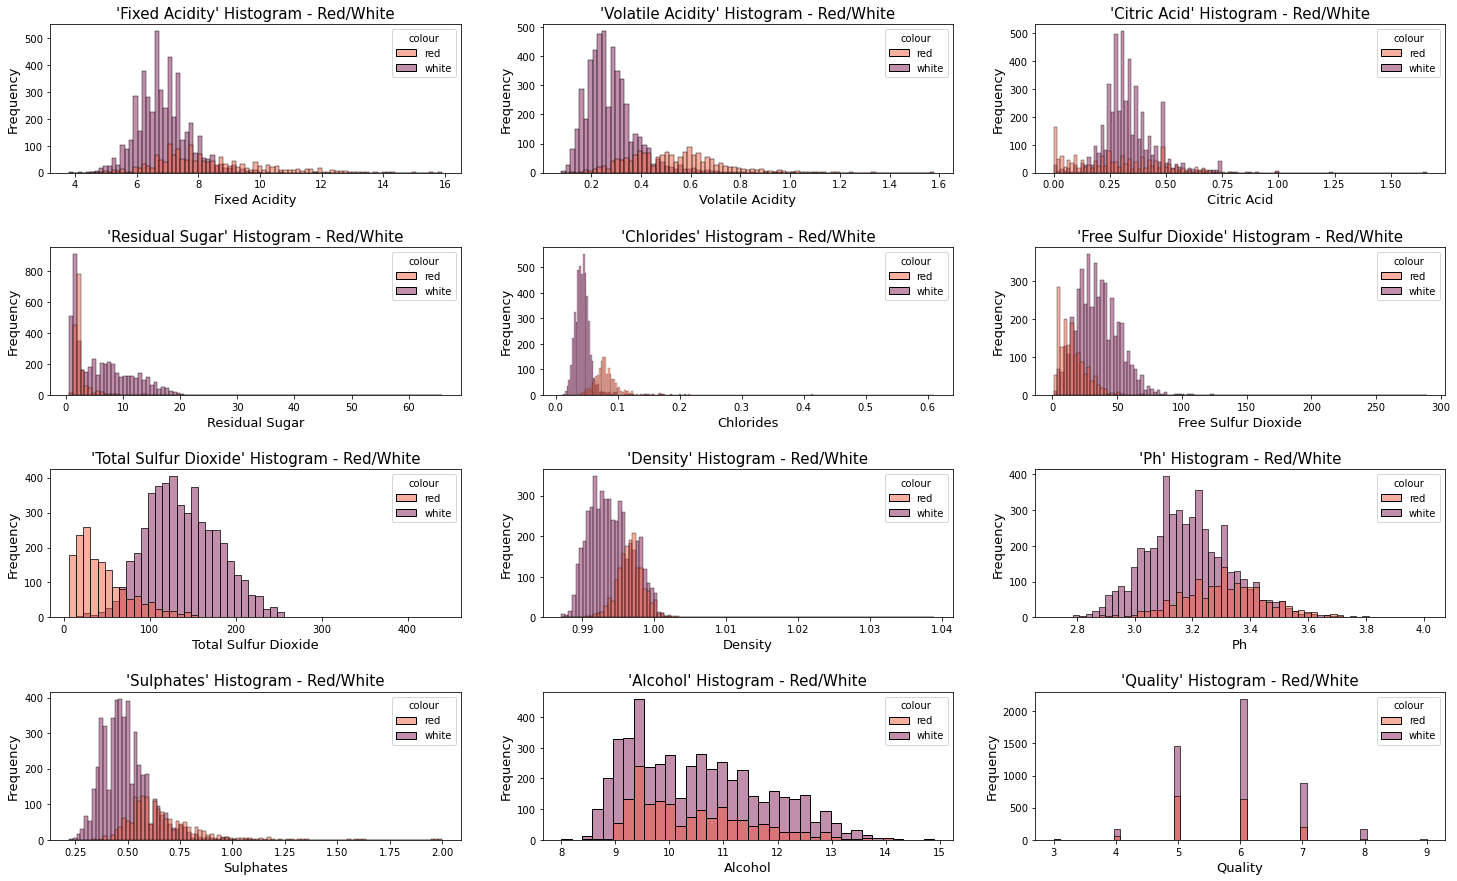

In [17]:
# Plot the distribution for each feature by colour
fig, axes = plt.subplots(4, 3, figsize=(25, 15))
r = 0
c = 0

for i in wine.columns:
    if i != 'colour':
        plot= sns.histplot(ax = axes[r, c], data = wine[i], x=wine[i], hue=wine.colour, palette='rocket_r');
        plot.set_title(f"'{i.title()}' Histogram - Red/White", fontsize=15)
        plot.set_ylabel("Frequency", fontsize=13)
        plot.set_xlabel(i.title(), fontsize=13)
        if c != 2:
            c += 1
        else: 
            c = 0
            r +=1

plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.2)
plt.show()

Boxplots can be used to see the outliers.

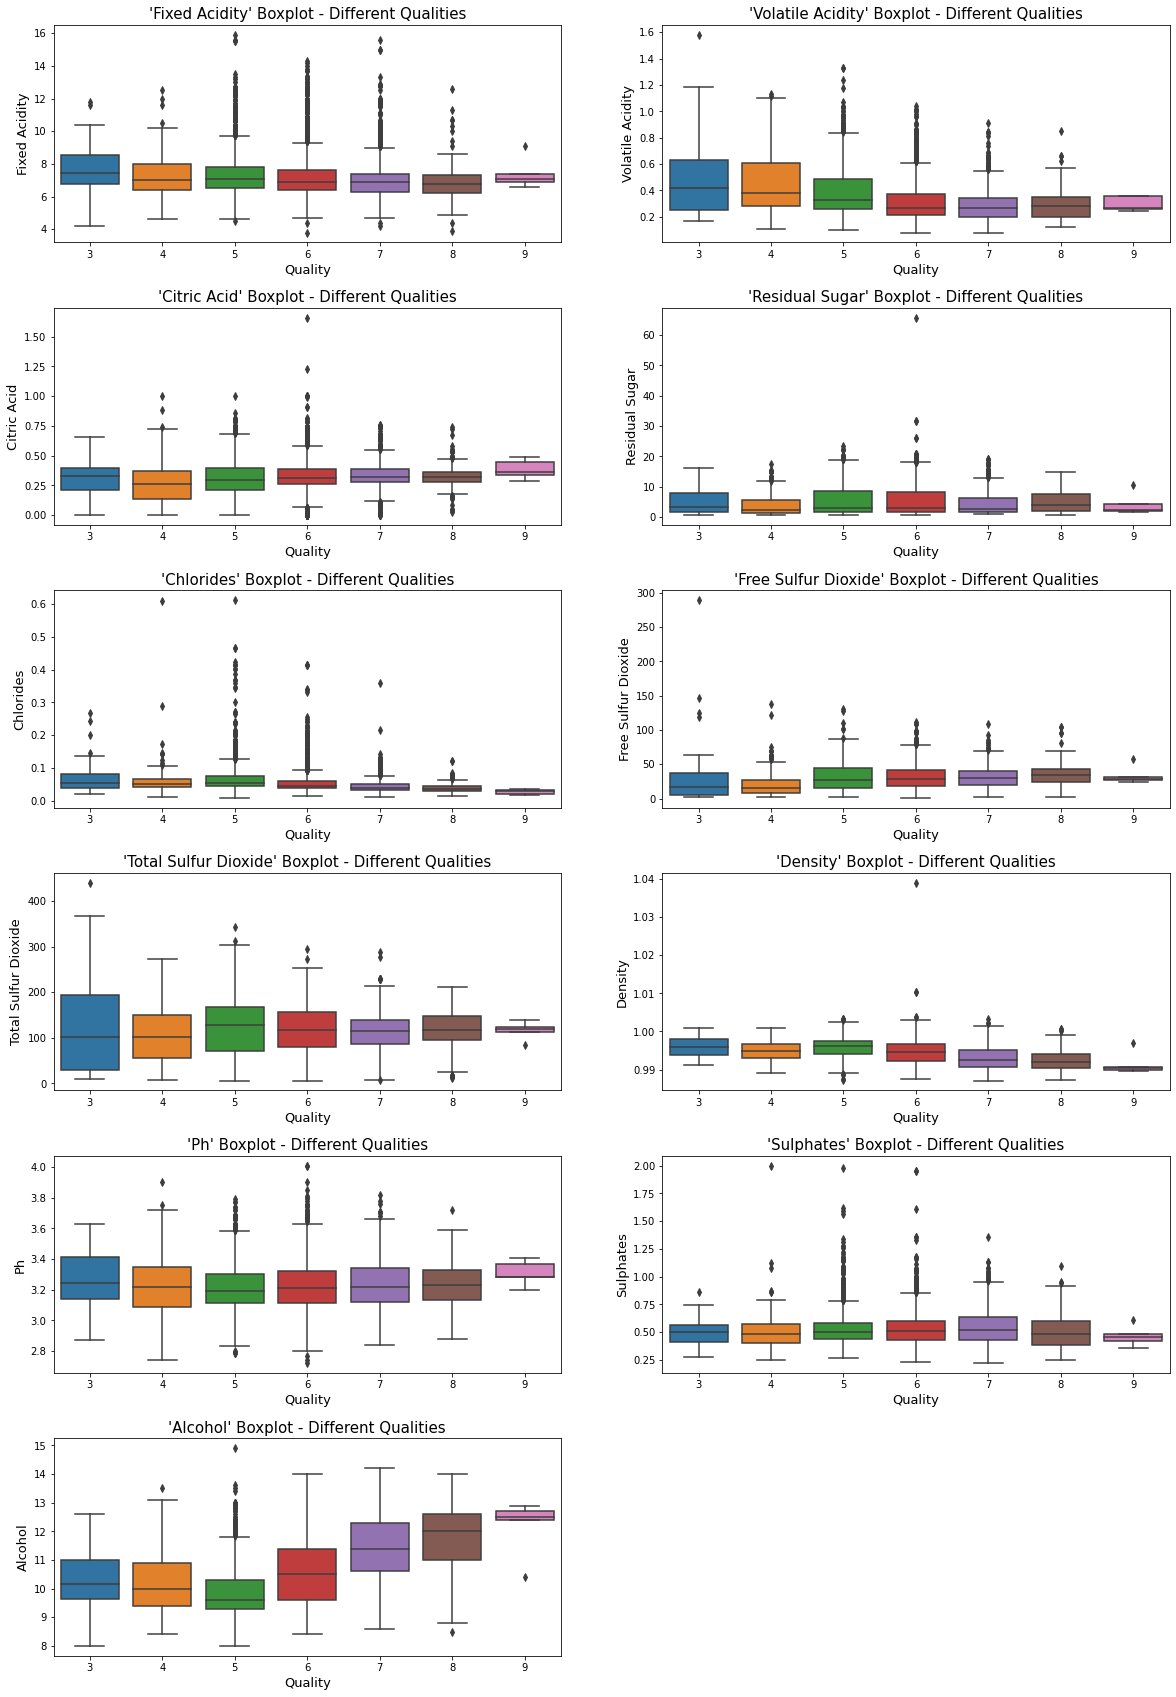

In [18]:
# Plot the boxplots for each feature by quality
fig, axes = plt.subplots(6, 2, figsize=(20, 30))
r = 0
c = 0

for i in wine.columns:
    if i != 'quality' and i != 'colour':
        plot = sns.boxplot(ax = axes[r, c], x=wine.quality, y = wine[i]);
        plot.set_title(f"'{i.title()}' Boxplot - Different Qualities", fontsize=15)
        plot.set_ylabel(i.title(), fontsize=13)
        plot.set_xlabel("Quality", fontsize=13)
        if c != 1:
            c += 1
        else: 
            c = 0
            r +=1
fig.delaxes(axes[5][1])

plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.2)
plt.show() 

Similarly, we can plot some violin plots to also see the probability density:

In [19]:
# Plot the violin plots for each feature by quality
fig, axes = plt.subplots(6, 2, figsize=(20, 30))
r = 0
c = 0

for i in wine.columns:
    if i != 'quality':
        plot = sns.violinplot(ax = axes[r, c], x=wine.quality, y = wine[i], palette='Set1');
        plot.set_title(f"'{i.title()}' Violin Plot - Different Qualities", fontsize=15)
        plot.set_ylabel(i.title(), fontsize=13)
        plot.set_xlabel("Quality", fontsize=13)
        if c != 1:
            c += 1
        else: 
            c = 0
            r +=1
fig.delaxes(axes[5][1])

plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.2)
plt.show() 

These plots suggest that there may be a number of outliers in the data, as there are values present in a number of variables that lie outside the interquartile range. 

##### Comparing Red and White Wines

Similar plots can be produced to see the differences between the red and white wine data.

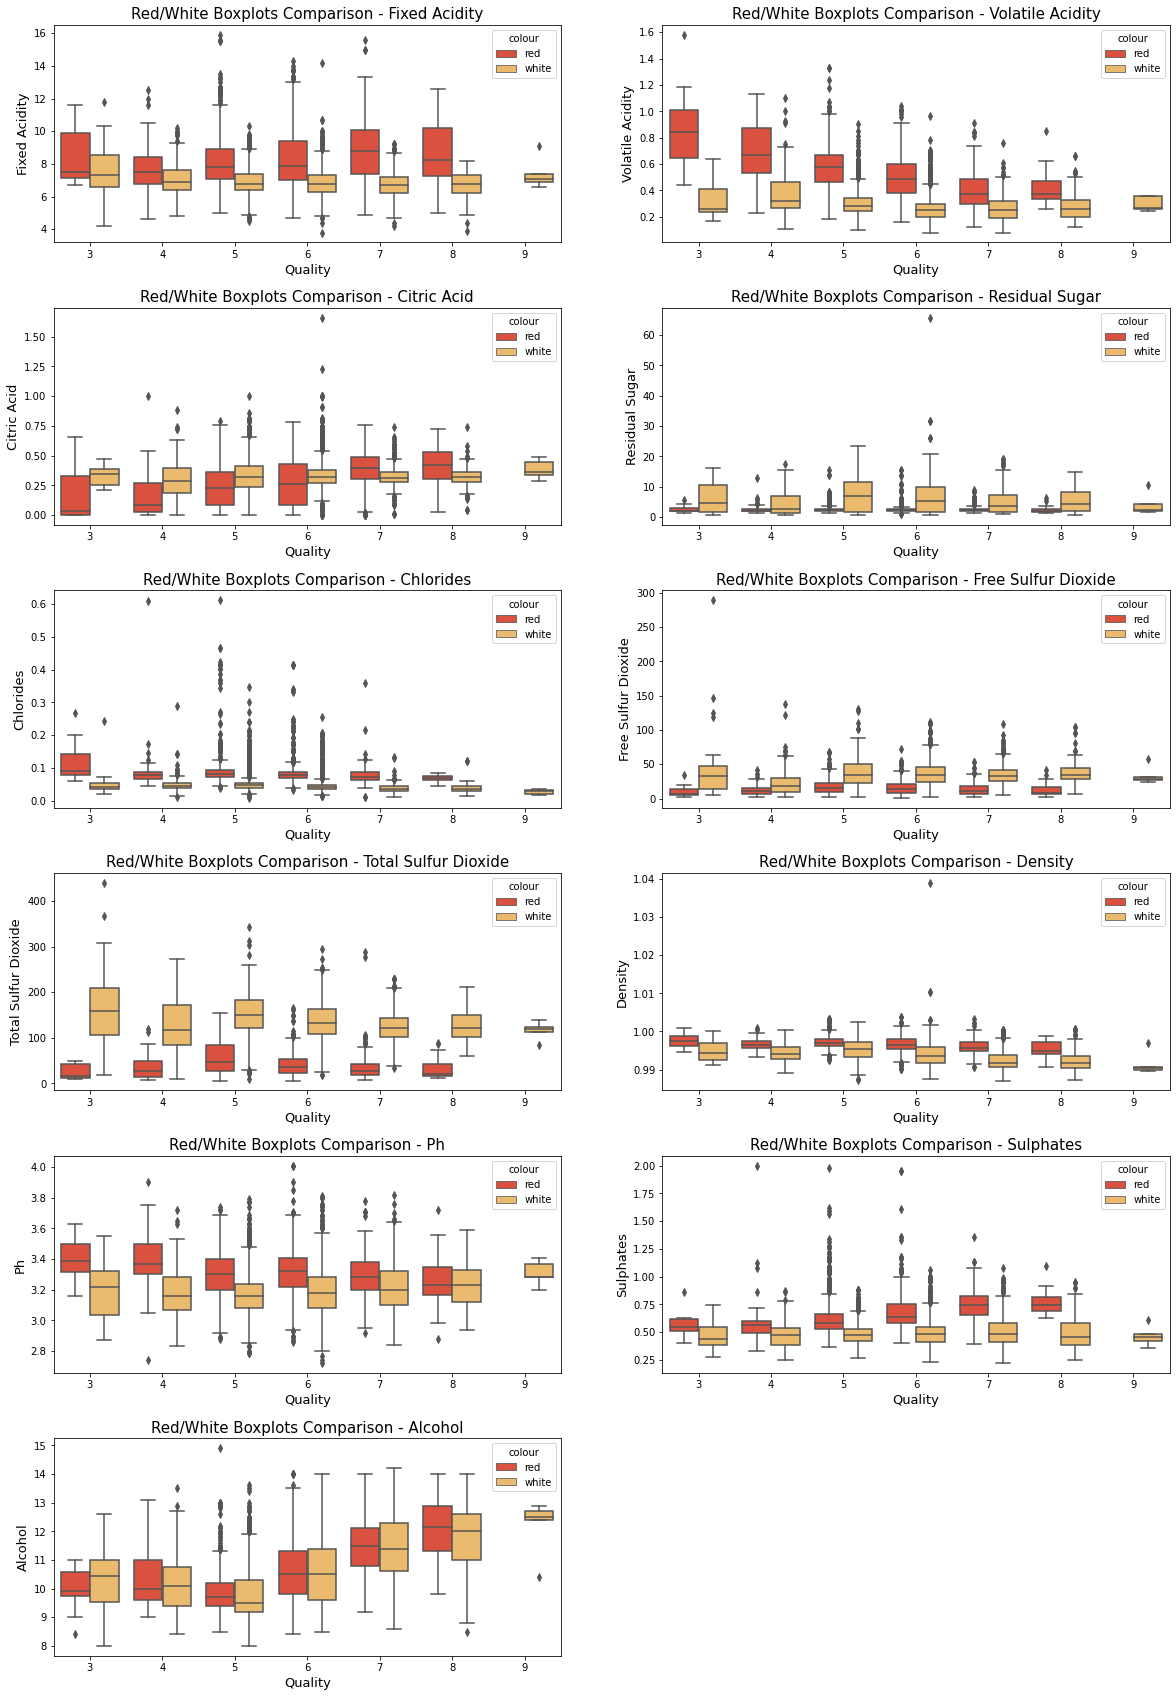

In [20]:
# Comparison of red and white wines using boxplots (individual features)
fig, axes = plt.subplots(6, 2, figsize=(20, 30))
r = 0
c = 0

for i in wine.columns:
    if i != 'quality' and i != 'colour':
        plot = sns.boxplot(ax = axes[r, c], x=wine.quality, y = wine[i], hue=wine.colour, palette='YlOrRd_r');
        plot.set_title(f"Red/White Boxplots Comparison - {i.title()}" , fontsize=15)
        plot.set_ylabel(i.title(), fontsize=13)
        plot.set_xlabel("Quality", fontsize=13)
        if c != 1:
            c += 1
        else: 
            c = 0
            r +=1
fig.delaxes(axes[5][1])

plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.2)
plt.show() 

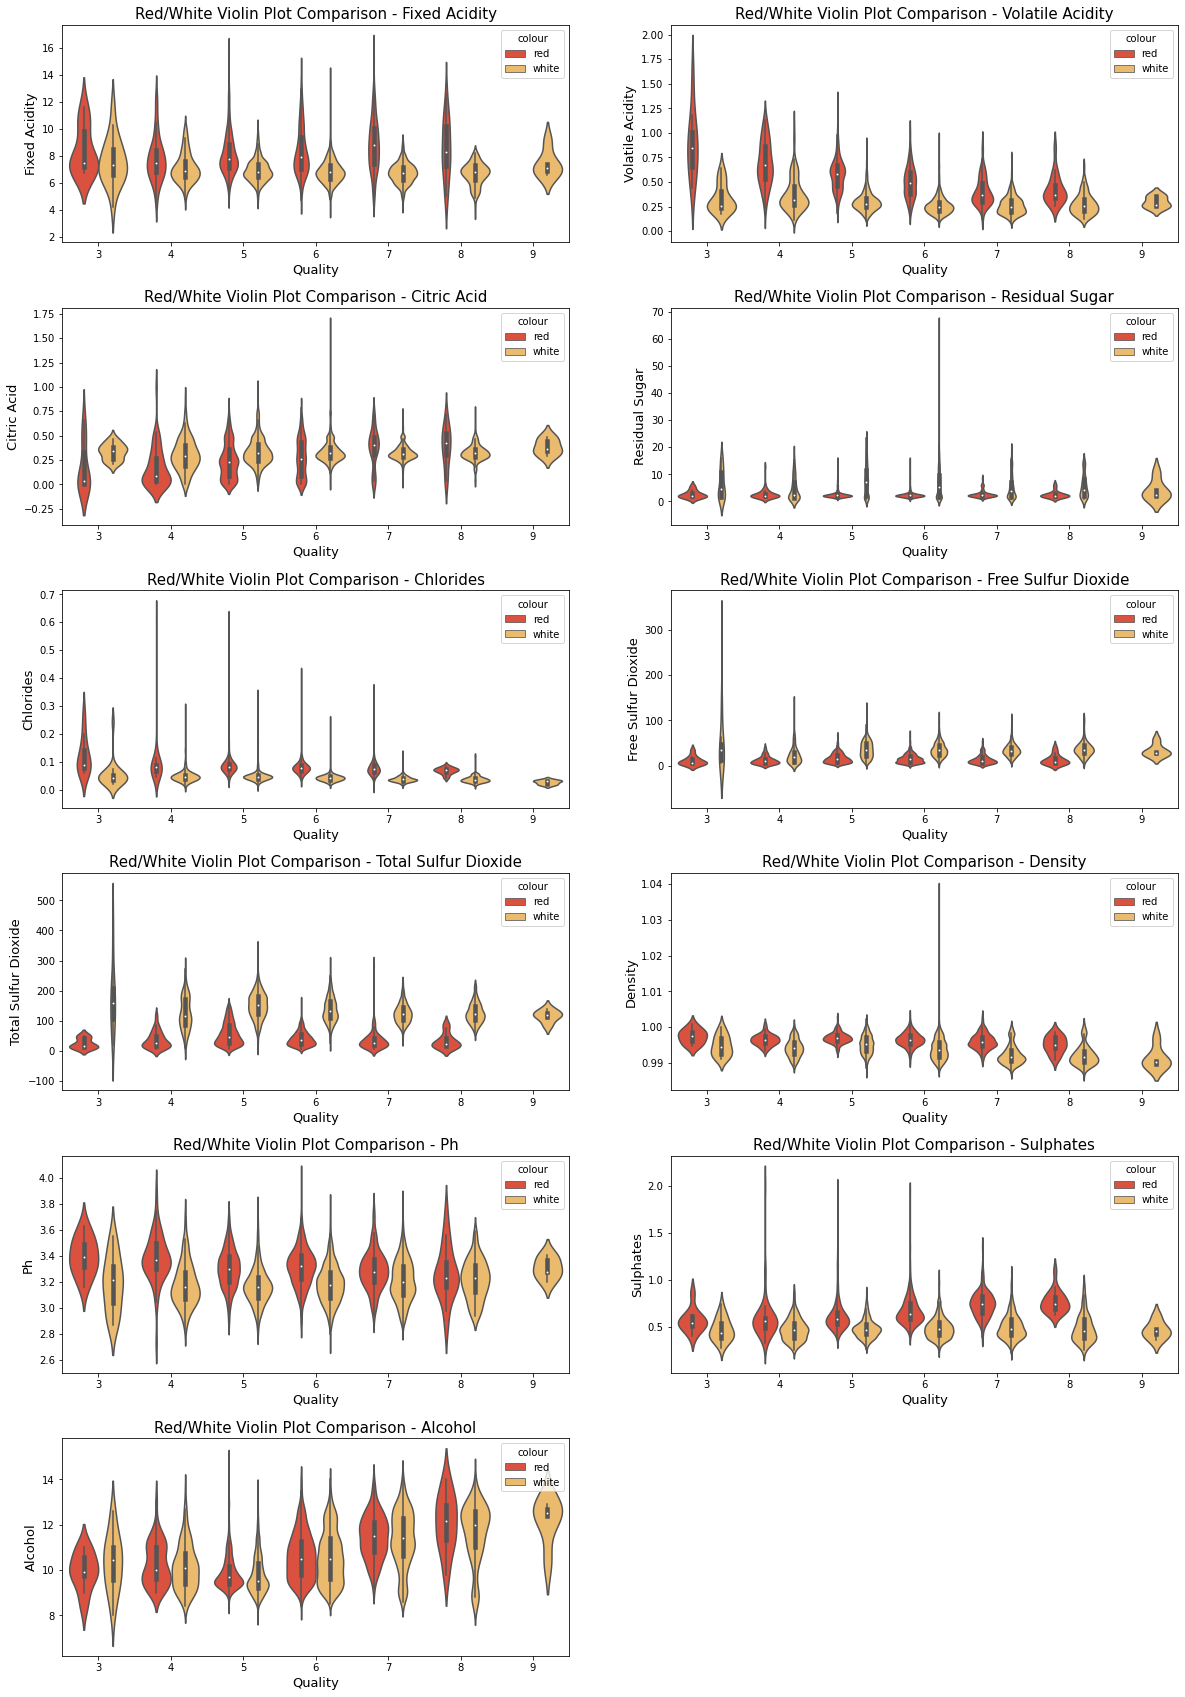

In [21]:
# Red/white comparison using violin plot (individual features)
fig, axes = plt.subplots(6, 2, figsize=(20, 30))
r = 0
c = 0

for i in wine.columns:
    if i != 'quality' and i != 'colour':
        plot = sns.violinplot(ax = axes[r, c], x=wine.quality, y = wine[i], hue=wine.colour, palette='YlOrRd_r');
        plot.set_title(f"Red/White Violin Plot Comparison - {i.title()}" , fontsize=15)
        plot.set_ylabel(i.title(), fontsize=13)
        plot.set_xlabel("Quality", fontsize=13)
        if c != 1:
            c += 1
        else: 
            c = 0
            r +=1
fig.delaxes(axes[5][1])

plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.2)
plt.show() 

#### Bivariate Analysis <a class="anchor" id="bivariate"></a>

Bivariate analysis describes the relationship between pairs of variables.

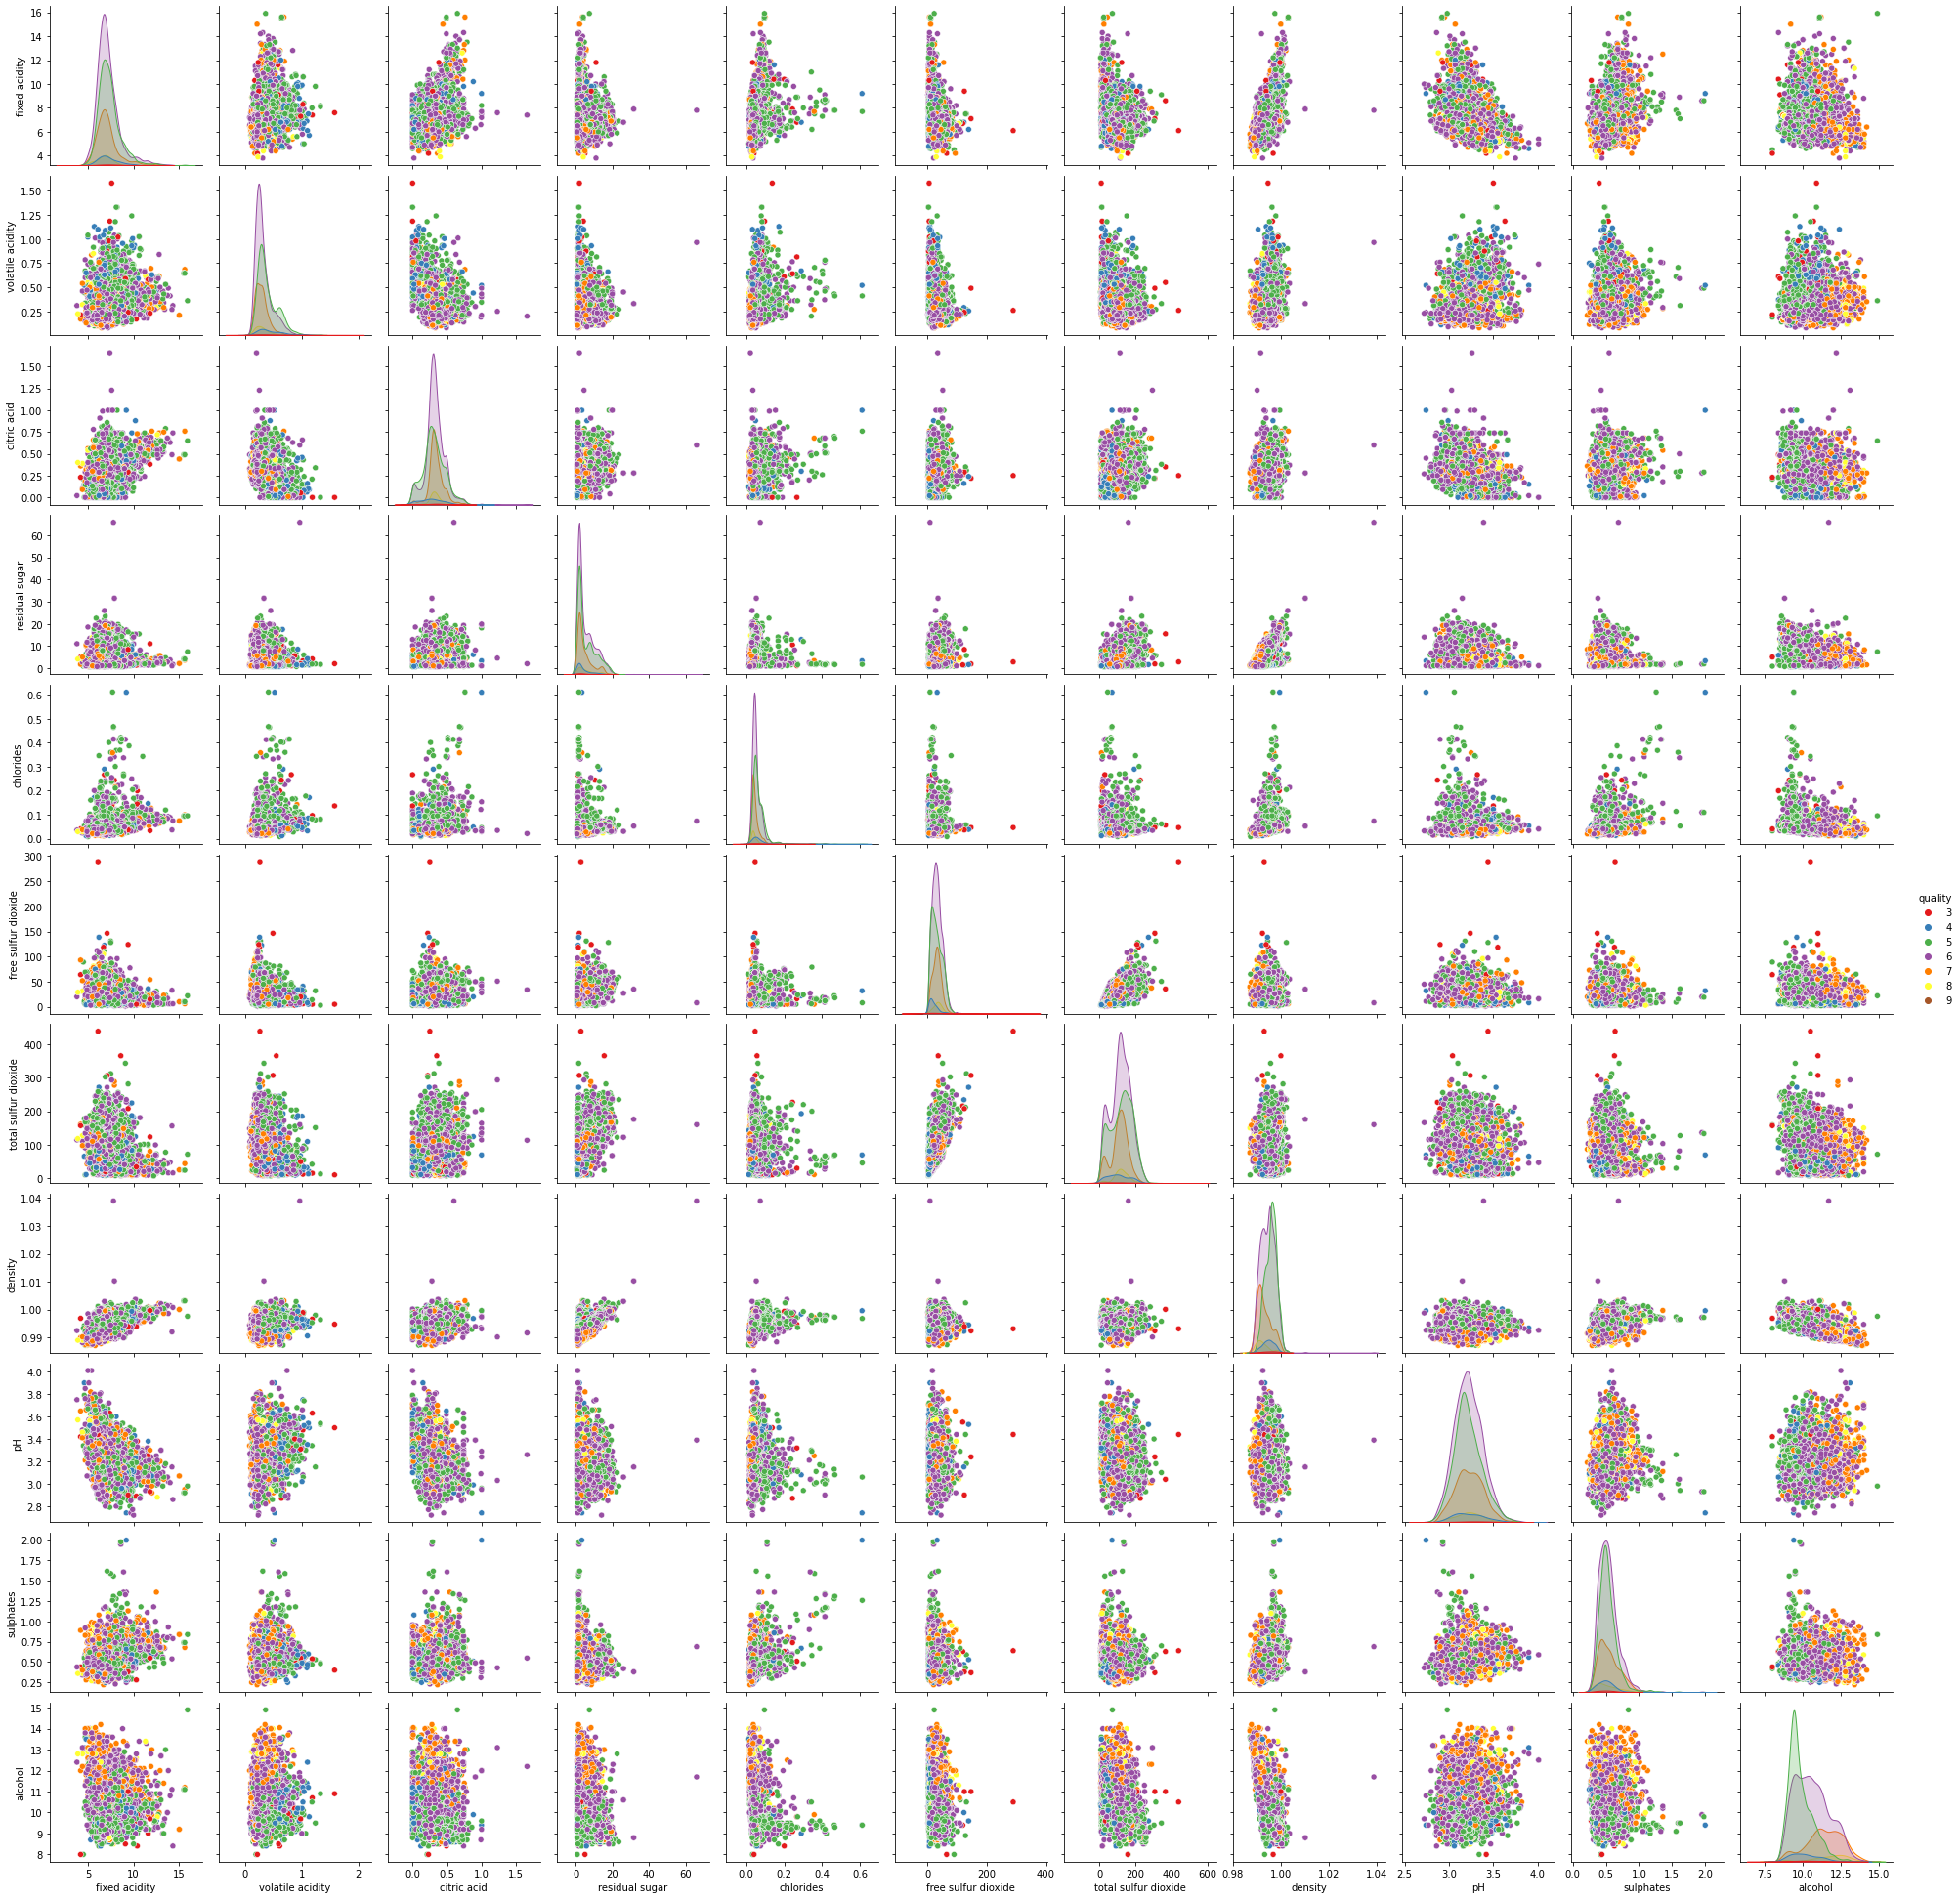

In [22]:
# Using seaborn to plot scatter plots for the variables;
# different colours representing different wine qualities
plot = sns.pairplot(wine, hue='quality', palette='Set1');

Different colours correspond to different target values. The scatterplots show that there might be some correlation between fixed acidity and citric acid as well as fixed acidity and density, as the plots resemble straight lines.

We can also see that there are likely some outliers present in the data as there are some data points with particularly high/low values.

##### Checking for Multicollinearity:

We can plot a heatmap to see any multicollinearity. Features that have high correlation should be removed.

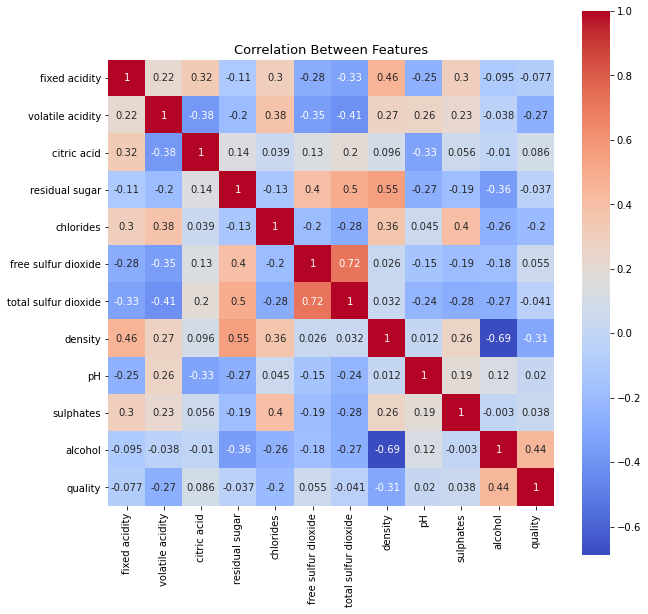

In [23]:
# Plot the heatmap 
plt.figure(figsize=(10, 10))
sns.heatmap(wine.corr(), annot=True, square=True, cmap='coolwarm');
plt.title("Correlation Between Features", fontsize=13)
plt.show()

This demonstrates that most features have low multicollinearity with one another, as the correlations between features are low. However, there does appear to be a correlation between density and both alcohol (-0.69) and residual sugar (0.55) levels. Total sulfur dioxide has strong correlation with free sulfur dioxide - 0.72. Hence, some features - density and total sulfur dioxide - should be removed.

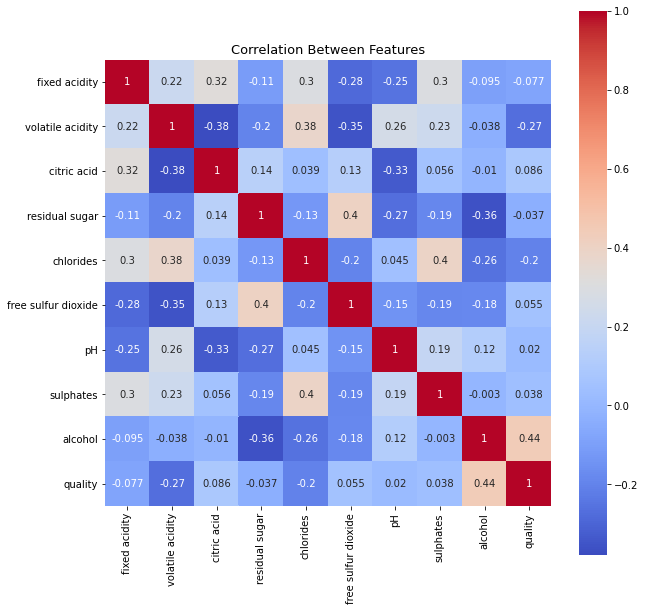

In [24]:
# Drop some features and plot the heatmap again
wine = wine.drop('density', axis=1)
wine = wine.drop('total sulfur dioxide', axis=1)
plt.figure(figsize=(10, 10))
sns.heatmap(wine.corr(), annot=True, square=True, cmap='coolwarm');
plt.title("Correlation Between Features", fontsize=13)
plt.show()

Replotting the heatmap does not show any high correlations.

### Pre-Processing <a class="anchor" id="pre_processing"></a>

Some qualities are underrepresented and should be removed.

In [25]:
# Check how many instances there are now for each quality
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

As there are so few values for some qualities (output), we cannot accurately train a model to classify them. These values should be dropped and excluded from the dataset. Hence, we should **drop** wines of **quality 3** and **quality 9** from the dataset as there are fewer than 100 instances of them.

In [26]:
# Drop wines with quality = 3
wine = wine[wine.quality != 3]

# Drop wines with quality = 9
wine = wine[wine.quality != 9]

# Show new value counts
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
Name: quality, dtype: int64

There aren't many instances of quality 4 or 8 but removing them will leave only mediocre wines, which are likely to be closer together and less differentiable.

We can plot a new histogram to see the distribution.

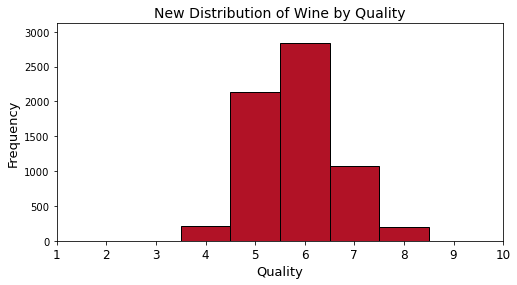

In [27]:
# Plot the new distribution by quality
quality = range(1, 11)

histogram = Counter(wine.quality)

plt.figure(figsize=(8, 4))
plt.bar([x for x in histogram.keys()], 
        histogram.values(),                 
        1,                                
        edgecolor=(0,0,0),
        color = '#b11226')

plt.axis([min(quality), len(quality), 0, max(histogram.values()) + max(histogram.values())/10])

plt.xticks([i for i in quality], fontsize=12)
plt.xlabel("Quality", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.title("New Distribution of Wine by Quality", fontsize=14)

plt.show()

##### Binary Encoding Categoric Feature 'Colour'

The colour values are categorical and take the values 'red' or 'white' exclusively. These can therefore be encoded as 1 and 0.

In [28]:
# Binary enccode colour
wine_new = wine.copy()
wine_new.loc[wine_new['colour'] == 'red', 'colour'] = 1
wine_new.loc[wine_new['colour'] == 'white', 'colour'] = 0
wine_new['colour'] = wine_new['colour'].astype(np.int64)
wine_new

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide    pH  sulphates  alcohol  quality  colour  
0                    11.0  3.51       0.56      9.4        5       1  
1                    25.0  3.20       0.68      9.8        5       1  
2                    15.0  3.26       0.65      9.8        5       1  
3                    17.0  3.16       0.58      9.8        6       1  
4                    11.0  3.51       0.56      9.4        5       1  
...                   ...   ...        ...      ...      ...     ...  
6492                 24.0  3.27       0.50     11.2        6       0  
6493                 57.0  3.15       0.46      9.6        5       0  
6494                 30.0  2.99       0.46      9.4        6       0  
6495                 20.0  3.34       0.38     12.8        7       0  
6496                 22.0  3.26       0.32     11.8        6       0  

[6462 rows x 11 columns]

##### Splitting Into Input and Output

At this point we can split the dataset into the output and the inputs.

In [29]:
# Split the dataset into our X and y values
y = wine_new.quality

X_discr = wine_new['colour']
X = wine_new.drop(['quality', 'colour'], axis=1)
X

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide    pH  sulphates  alcohol  
0                    11.0  3.51       0.56      9.4  
1                    25.0  3.20       0.68      9.8  
2                    15.0  3.26       0.65      9.8  
3                    17.0  3.16       0.58      9.8  
4                    11.0  3.51       0.56      9.4  
...                   ...   ...        ...      ...  
6492                 24.0  3.27       0.50     11.2  
6493                 57.0  3.15       0.46      9.6  
6494                 30.0  2.99       0.46      9.4  
6495                 20.0  3.34       0.38     12.8  
6496                 22.0  3.26       0.32     11.8  

[6462 rows x 9 columns]

In [30]:
# Print y values 
y

0       5
1       5
2       5
3       6
4       5
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6462, dtype: int64

In [31]:
# Save a list of column names and targets for future use
cont_cols = X.columns.tolist()
discr_cols = X_discr.name
target_names = [str(i) for i in sorted(y.unique())]

In [32]:
# Output the data types and dimensions for the inputs 
print('X Data Types:\n \n{}'.format(X.dtypes))
print('\nX Shape: {}'.format(X.shape))

X Data Types:
 
fixed acidity          float64
volatile acidity       float64
citric acid            float64
residual sugar         float64
chlorides              float64
free sulfur dioxide    float64
pH                     float64
sulphates              float64
alcohol                float64
dtype: object

X Shape: (6462, 9)


In [33]:
# Output the data type for the output
print('y Data Type: {}\n'.format(y.dtype))
print('y Values: \n{}'.format(y.value_counts()))

y Data Type: int64

y Values: 
6    2836
5    2138
7    1079
4     216
8     193
Name: quality, dtype: int64


##### Normalisation
To ensure that all algorithms work correctly with out data, we should normalise the inputs. 

Scaling the data so that all features are normalised with unit variance and mean 0:

In [34]:
# Normalise
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[ 0.1451891 ,  2.21531915, -2.19549747, ...,  1.81752607,
         0.1918234 , -0.9157643 ],
       [ 0.45440905,  3.31952796, -2.19549747, ..., -0.11369118,
         0.99765005, -0.5802518 ],
       [ 0.45440905,  2.58338875, -1.91998908, ...,  0.2600928 ,
         0.79619339, -0.5802518 ],
       ...,
       [-0.55055578, -0.60654779, -0.88683261, ..., -1.42193513,
        -0.4796988 , -0.9157643 ],
       [-1.32360564, -0.29982313, -0.12918453, ...,  0.75847145,
        -1.01691657,  1.936092  ],
       [-0.93708071, -0.79058259,  0.42183225, ...,  0.2600928 ,
        -1.41982989,  1.09731073]])

The input features are now all numeric data and were normalised to have mean 0 and unit variance. The assumption of normality holds for all of the input data.

### Outlier Detection <a class="anchor" id="outlier"></a>
As the EDA has demonstrated that there may be some anomalous data, it will be wise to look further into outliers.
##### Z-Score

Adapted from: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

As the data has been normalised, we can expect it to follow a normal distribution and therefore expect 99.7% of the data to lie within 3 standard deviations of the mean. It is further expected that 99.9% of the data should lie within 4 standard deviations from the mean. We will use this information as a threshold for outliers. When we calculate z-score, we find the number of standard deviations (z) that the value deviates from the mean by.

In [35]:
# Calculating the z-score for the numpy array
z = np.abs(stats.zscore(X))
print(z)

[[0.1451891  2.21531915 2.19549747 ... 1.81752607 0.1918234  0.9157643 ]
 [0.45440905 3.31952796 2.19549747 ... 0.11369118 0.99765005 0.5802518 ]
 [0.45440905 2.58338875 1.91998908 ... 0.2600928  0.79619339 0.5802518 ]
 ...
 [0.55055578 0.60654779 0.88683261 ... 1.42193513 0.4796988  0.9157643 ]
 [1.32360564 0.29982313 0.12918453 ... 0.75847145 1.01691657 1.936092  ]
 [0.93708071 0.79058259 0.42183225 ... 0.2600928  1.41982989 1.09731073]]


In [36]:
# Finding values with z-score greater than 4
threshold = 3
print(np.where(z > threshold))

(array([   1,    3,   13,   14,   15,   17,   17,   19,   19,   38,   38,
         42,   43,   45,   46,   79,   81,   81,   83,   83,   86,   88,
         91,   92,   94,   94,   95,   98,  106,  106,  120,  120,  126,
        127,  134,  147,  151,  151,  151,  160,  161,  169,  169,  170,
        181,  181,  197,  198,  199,  201,  205,  206,  212,  226,  226,
        234,  239,  240,  240,  241,  243,  244,  252,  258,  258,  258,
        261,  264,  265,  266,  269,  271,  277,  280,  281,  281,  286,
        289,  291,  294,  296,  301,  303,  307,  308,  326,  328,  335,
        338,  338,  339,  339,  340,  340,  344,  347,  350,  353,  353,
        356,  358,  359,  362,  363,  364,  366,  369,  372,  374,  375,
        376,  376,  377,  378,  378,  381,  390,  391,  394,  395,  395,
        397,  398,  402,  403,  407,  408,  409,  415,  418,  421,  422,
        424,  425,  429,  429,  432,  433,  435,  437,  440,  441,  442,
        442,  446,  449,  450,  451,  451,  455,  

In [37]:
# Removing rows which may contain the outlier values (i.e finding rows with z-scores less than threshold only)
X_o = X_scaled[(z < threshold).all(axis=1)]
# Check the dimensions of the new input data array
print(X_o.shape)
X_o

(5972, 9)


array([[ 0.1451891 ,  2.21531915, -2.19549747, ...,  1.81752607,
         0.1918234 , -0.9157643 ],
       [ 0.45440905,  2.58338875, -1.91998908, ...,  0.2600928 ,
         0.79619339, -0.5802518 ],
       [ 0.1451891 ,  2.21531915, -2.19549747, ...,  1.81752607,
         0.1918234 , -0.9157643 ],
       ...,
       [-0.55055578, -0.60654779, -0.88683261, ..., -1.42193513,
        -0.4796988 , -0.9157643 ],
       [-1.32360564, -0.29982313, -0.12918453, ...,  0.75847145,
        -1.01691657,  1.936092  ],
       [-0.93708071, -0.79058259,  0.42183225, ...,  0.2600928 ,
        -1.41982989,  1.09731073]])

In [38]:
# Removing the outlier rows from the output variable column vector
y_o = y[(z < threshold).all(axis=1)]
print(y_o.shape)

(5972,)


In [39]:
# Removing the outlier rows from the wine colour columns 
X_discr_o = X_discr[(z < threshold).all(axis=1)]
print(X_discr_o.shape)

(5972,)


In [40]:
# Reset the index
X_discr_o = X_discr_o.reset_index(drop=True)
y_o = y_o.reset_index(drop=True)

We should check that the resulting dimensions are the same:

In [41]:
# Print out the number instances for each quality
y_o.value_counts()

6    2628
5    1953
7    1024
8     184
4     183
Name: quality, dtype: int64

In [42]:
# Print out the discrete input (colour)
X_discr_o

0       1
1       1
2       1
3       1
4       1
       ..
5967    0
5968    0
5969    0
5970    0
5971    0
Name: colour, Length: 5972, dtype: int64

The dimensions are the same so the dataset can be put back together.

In [43]:
# Stitch back together for post outlier-removal visualisations
wine_no_outlier = pd.DataFrame(data=X_o, columns=cont_cols)

# wine_no_outlier['colour_red'] = X_discr_o['colour_red']
# wine_no_outlier['colour_white'] = X_discr_o['colour_white']
wine_no_outlier[X_discr_o.name] = X_discr_o
wine_no_outlier[y_o.name] = y_o
wine_no_outlier

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.145189          2.215319    -2.195497       -0.745098   0.575242   
1          0.454409          2.583389    -1.919989       -0.661041   1.034483   
2          0.145189          2.215319    -2.195497       -0.745098   0.575242   
3          0.145189          1.969939    -2.195497       -0.766112   0.546539   
4          0.531714          1.601870    -1.782235       -0.808141   0.374324   
...             ...               ...          ...             ...        ...   
5967      -0.782471         -0.790583    -0.198062       -0.808141  -0.486753   
5968      -0.473251         -0.115788     0.284078        0.536776  -0.257133   
5969      -0.550556         -0.606548    -0.886833       -0.892198  -0.429348   
5970      -1.323606         -0.299823    -0.129185       -0.913213  -0.974697   
5971      -0.937081         -0.790583     0.421832       -0.976256  -1.032102   

      free sulfur dioxide        pH  sulphates   alcohol  colour  quality  
0               -1.124692  1.817526   0.191823 -0.915764       1        5  
1               -0.893781  0.260093   0.796193 -0.580252       1        5  
2               -1.124692  1.817526   0.191823 -0.915764       1        5  
3               -1.009236  1.817526   0.191823 -0.915764       1        5  
4               -0.893781  0.509282  -0.479699 -0.915764       1        5  
...                   ...       ...        ...       ...     ...      ...  
5967            -0.374233  0.322390  -0.211090  0.594042       0        6  
5968             1.530777 -0.425178  -0.479699 -0.748008       0        5  
5969            -0.027868 -1.421935  -0.479699 -0.915764       0        6  
5970            -0.605143  0.758471  -1.016917  1.936092       0        7  
5971            -0.489688  0.260093  -1.419830  1.097311       0        6  

[5972 rows x 11 columns]

There are now 5972 records and many outliers have been exluded. This is a reduction from the inital 6462, so 490 records have been exluded.

It is important to check that no missing values were created in the process:

In [44]:
# Check for null values
wine_no_outlier.isnull().sum()

fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
pH                     0
sulphates              0
alcohol                0
colour                 0
quality                0
dtype: int64

There are still no null values. 

Having removed some of the outliers, we can plot the boxplots again:

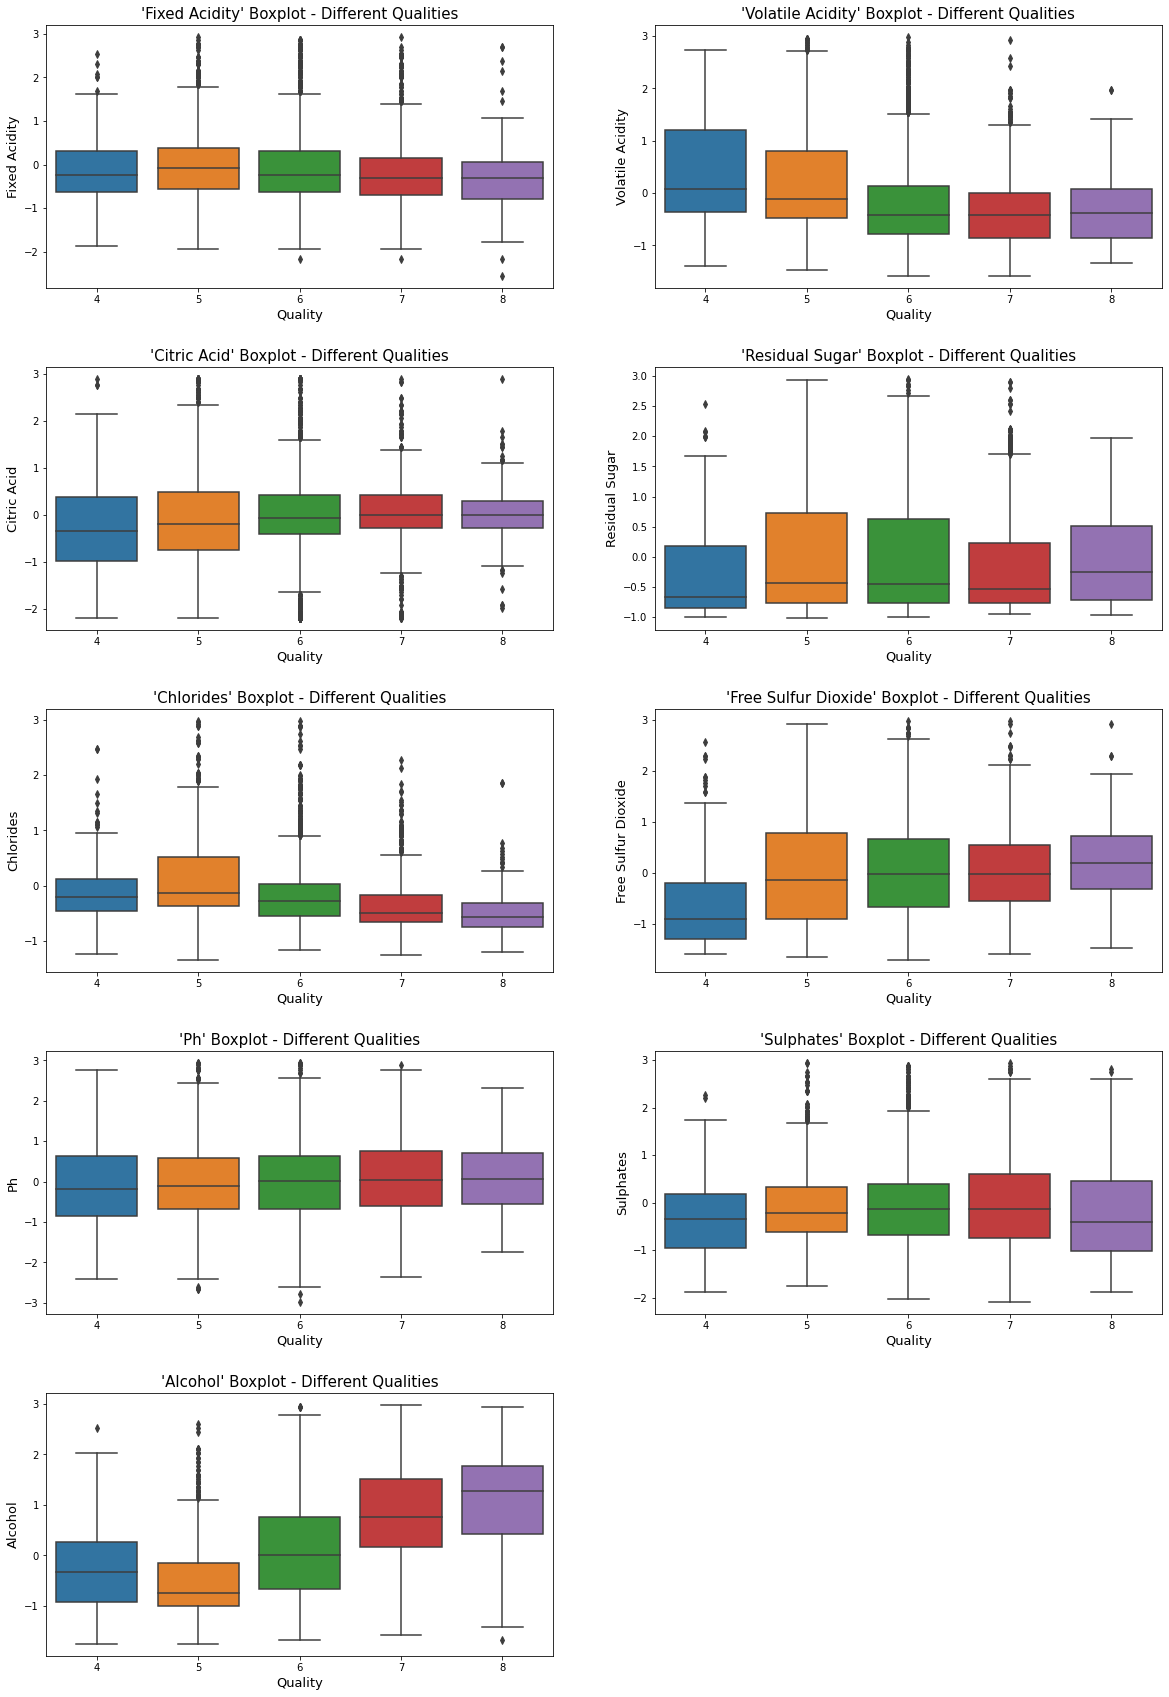

In [45]:
# Check again for outliers using boxplots (Individual features by quality)
fig, axes = plt.subplots(5, 2, figsize=(20, 30))
r = 0
c = 0

for i in wine_no_outlier.columns:
    if i != y_o.name and i != X_discr_o.name:
        plot = sns.boxplot(ax = axes[r, c], x=wine_no_outlier.quality, y = wine_no_outlier[i]);
        plot.set_title(f"'{i.title()}' Boxplot - Different Qualities", fontsize=15)
        plot.set_ylabel(i.title(), fontsize=13)
        plot.set_xlabel("Quality", fontsize=13)
        if c != 1:
            c += 1
        else: 
            c = 0
            r +=1
fig.delaxes(axes[4][1])

plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.2)
plt.show() 

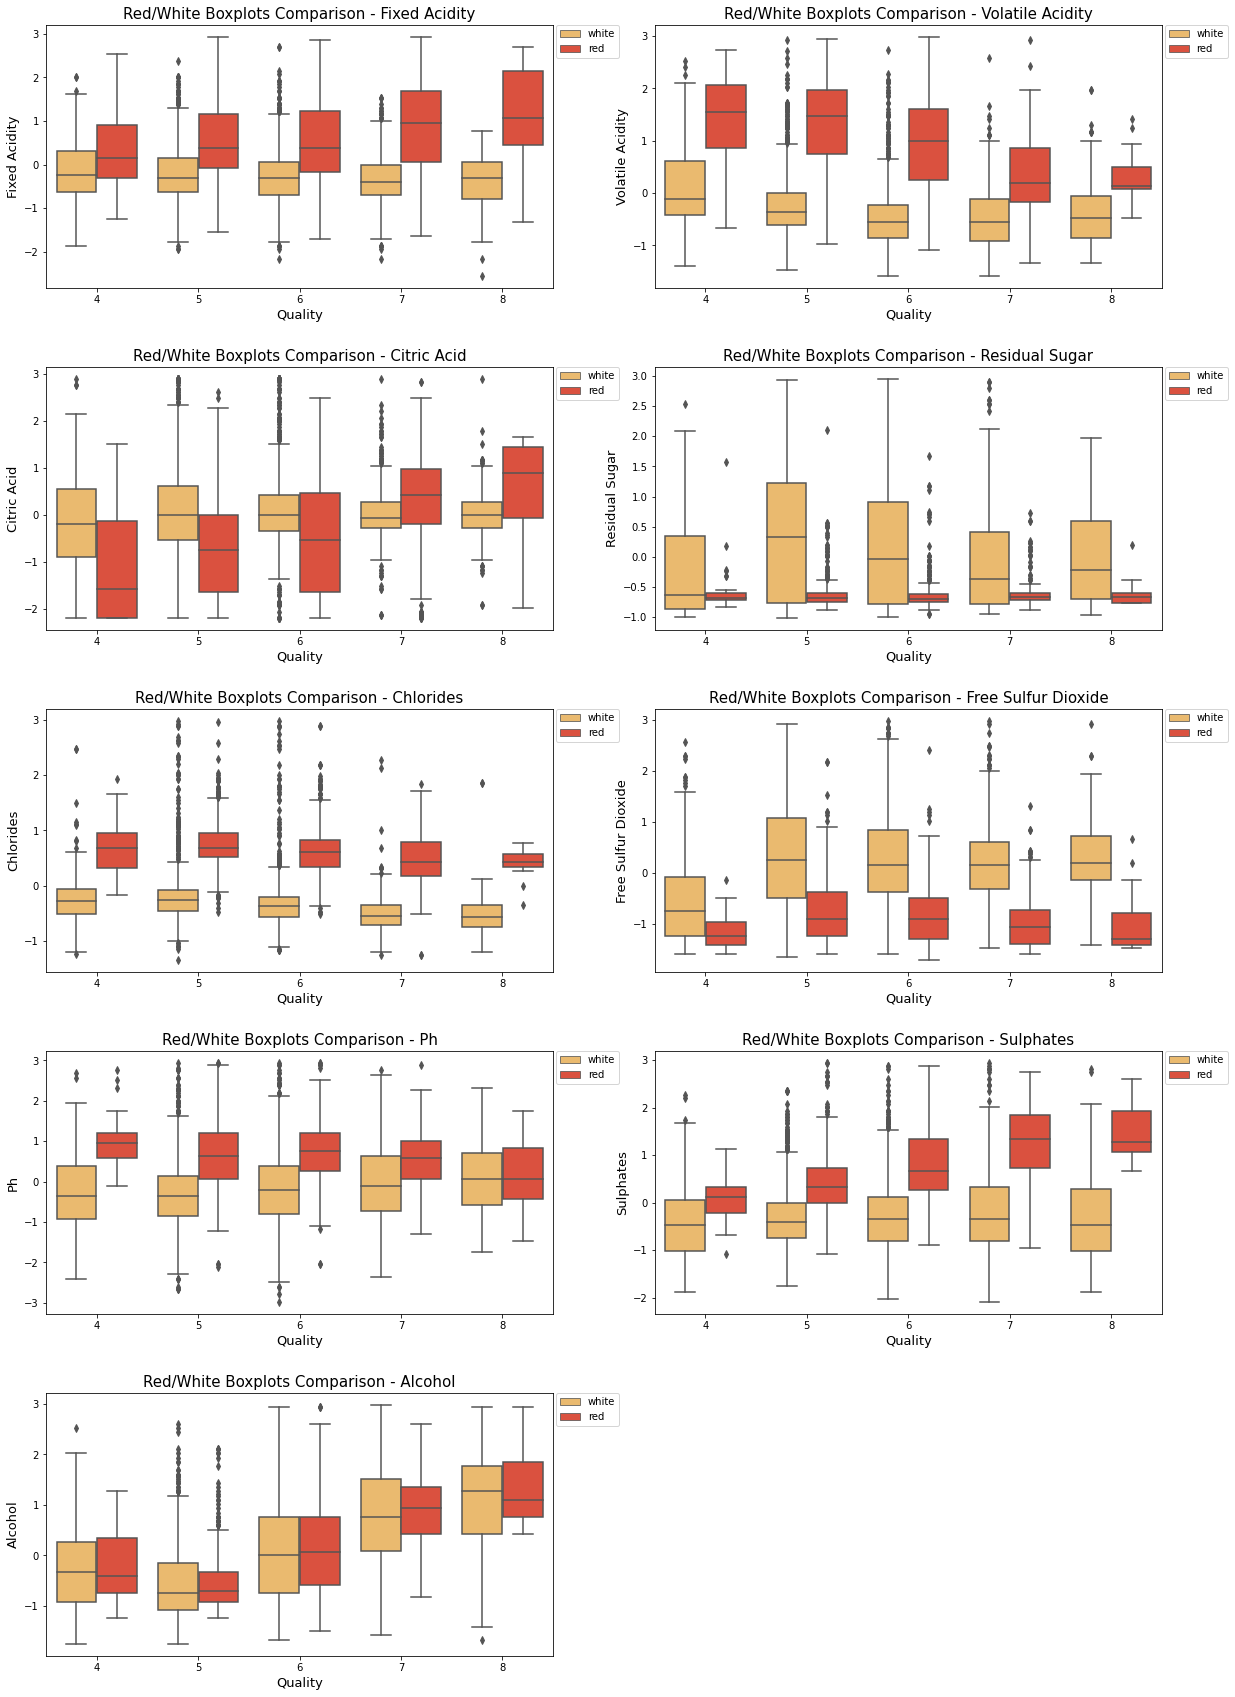

In [46]:
# Check again for outliers using boxplots (Individual features by colour)
fig, axes = plt.subplots(5, 2, figsize=(20, 30))
r = 0
c = 0

for i in wine_no_outlier.columns:
    if i != y_o.name and i != X_discr_o.name:
        plot = sns.boxplot(ax = axes[r, c], x=wine_no_outlier.quality, y = wine_no_outlier[i], hue=wine_no_outlier.colour, palette='YlOrRd');
        plot.set_title(f"Red/White Boxplots Comparison - {i.title()}" , fontsize=15)
        plot.set_ylabel(i.title(), fontsize=13)
        plot.set_xlabel("Quality", fontsize=13)
        plot.legend(bbox_to_anchor=(1.14, 1.02), loc='upper right')
        label_w = "white"
        label_r = "red"
        plot.legend_.texts[0].set_text(label_w)
        plot.legend_.texts[1].set_text(label_r)
        if c != 1:
            c += 1
        else: 
            c = 0
            r +=1
fig.delaxes(axes[4][1])

plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.2)
plt.show() 

There are now fewer outliers but they are still present. Removing more of them would greatly reduce the size of our dataset, which will result in not enough training data.

In [47]:
# Check the data type of colour
type(wine_no_outlier.colour[1])

numpy.int64

With the dataset being put together, we can plot the heatmap again to check if any further dimensionality reduction can be performed. 

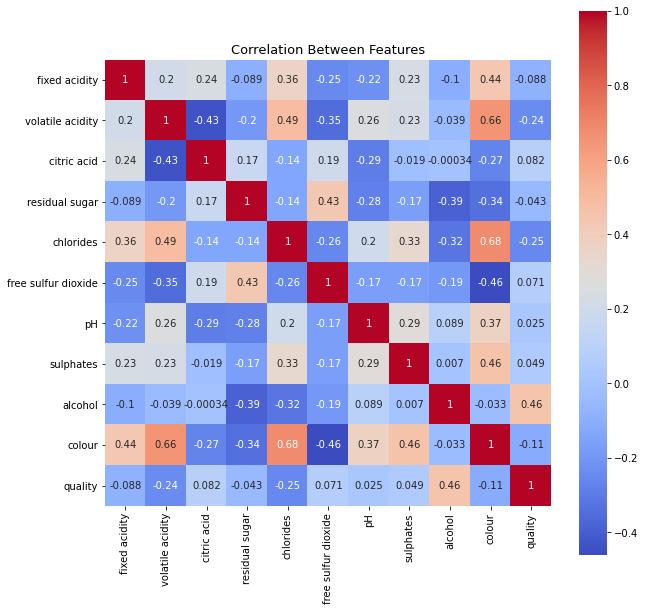

In [48]:
# Re-plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(wine_no_outlier.corr(), annot=True, square=True, cmap='coolwarm');
plt.title("Correlation Between Features", fontsize=13)
plt.show()

There is some correlation between colour and other features, so colour should be dropped.

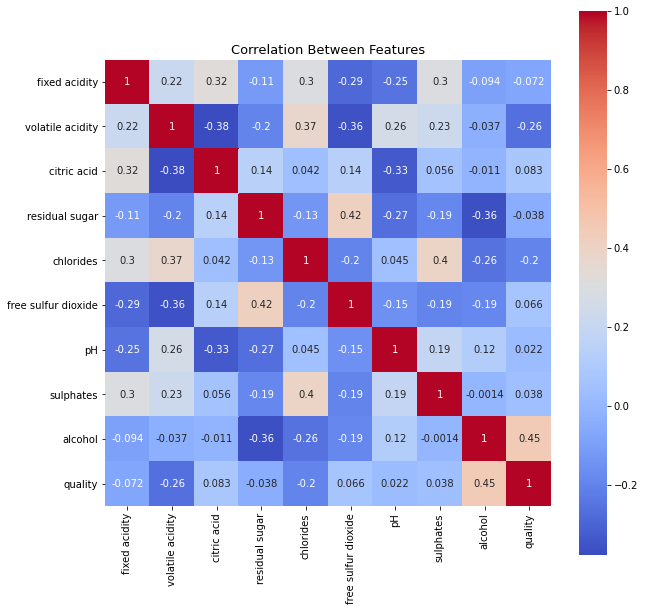

In [49]:
# Drop colour and plot the heatmap again
wine_no_outlier = wine_no_outlier.drop('colour', axis=1)
plt.figure(figsize=(10, 10))
sns.heatmap(wine.corr(), annot=True, square=True, cmap='coolwarm');
plt.title("Correlation Between Features", fontsize=13)
plt.show()

We can now finalise the input data:

In [50]:
# Finalise the input and the column names
X_o = wine_no_outlier.drop('quality', axis=1)
col_names_X = X_o.columns.tolist()

##### Splitting into Training and Testing Datasets
The data is split using the Holdout method into training and test data. The training data will be used to train the models and for hyperparameter tuning (by further splitting into train and validation sets using k-fold cross-validation), and the unseen test data will be used at the end of analysis to evaluate model performance. The rows are randomised using the ``shuffle=True`` parameter.

For example, see https://scikit-learn.org/stable/_images/grid_search_cross_validation.png:

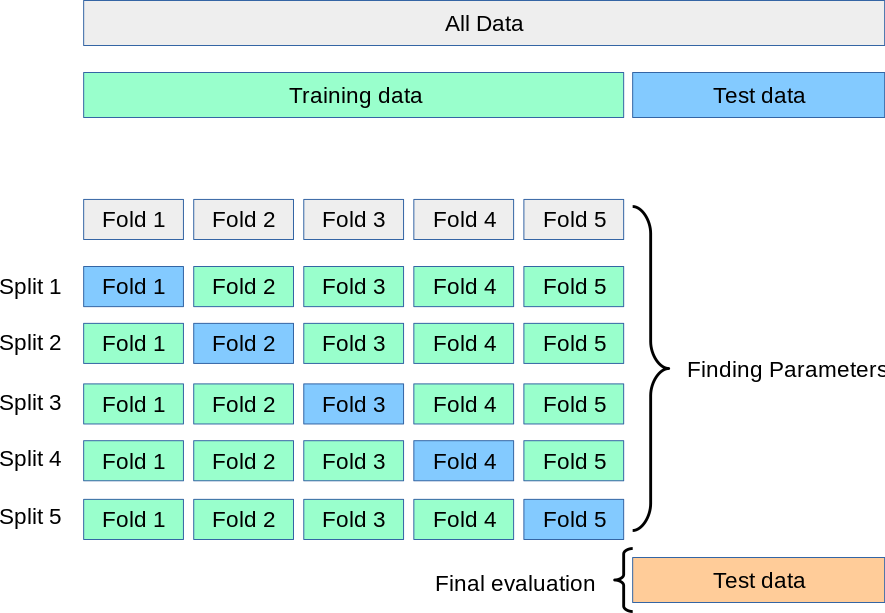

In [51]:
# <img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="500">

display.Image("https://scikit-learn.org/stable/_images/grid_search_cross_validation.png")

20% of data should be left to test the performance and not be used for training or hyperparameter tuning:

In [52]:
# Split the data into train and test (20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_o, y_o, test_size=0.2, shuffle=True, stratify=y_o, random_state = 0)

print("Training and Validation Data Shape: {}".format(X_train_val.shape))
print("Testing Data Shape: {}".format(X_test.shape))

Training and Validation Data Shape: (4777, 9)
Testing Data Shape: (1195, 9)


The *stratify* parameter ensures that the number of instances belonging to each quality are proportional between the test and train subsets.

In [53]:
# Check the split
print(Counter(y_train_val).items())
print(Counter(y_test).items())

dict_items([(5, 1562), (7, 819), (6, 2102), (8, 147), (4, 147)])
dict_items([(5, 391), (6, 526), (7, 205), (4, 36), (8, 37)])


## Models <a class="anchor" id="models"></a>

Before tuning the hyperparameters, it is interesting to see the perfomance of default models. 

### Decision Tree Classifier

We begin by plotting an inital decision tree with all of the training data, which can be used as a base decision tree model for the data.

In [54]:
%%time
# Create folds and fit the inital Decision Tree
kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

dt_classifier = DecisionTreeClassifier(random_state=0)

tree1 = dt_classifier.fit(X_train_val, y_train_val)

CPU times: user 32.4 ms, sys: 2.19 ms, total: 34.6 ms
Wall time: 32.7 ms


This initial tree can be visualised using the ``plot_tree`` module.

In [55]:
# Set the figure size
plt.figure(figsize=(15,15))

# Plot the initial decision tree
plot_tree(tree1, filled=True)
plt.show()

The decision tree classifier is clearly highly complex and has a large number of branches. To improve the model, the model hyperparameters need to be inspected.

As the tree is large, the better way is to use ``graphviz`` package to visualise the initial decision tree. This method has been adapted from the sci-kit learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

In [56]:
# Install graphviz (using conda)
# !conda install -c anaconda graphviz 
# OR
# !conda install -c conda-forge python-graphviz -y
# !pip install graphiz

In [57]:
# Export the tree
dot_data = export_graphviz(tree1, out_file=None,
                           filled=True, rounded=True,  
                           special_characters=True, 
                           feature_names=col_names_X,
                           class_names=target_names)
graph = graphviz.Source(dot_data) 
graph.render("tree1",view = True)

# This has been outputted to the file tree1.pdf

'tree1.pdf'

We can also check the perfomance of the model on the train and test data:

In [58]:
# Output some scores 
cv_results0 = cross_validate(dt_classifier, X_train_val, y_train_val, 
                             cv=kfold, return_train_score=True, 
                             scoring='f1_weighted')

# Find the mean train score for dt
train_score_mean0 = np.mean(cv_results0['train_score'])
# Find the mean val score for dt
val_score_mean0 = np.mean(cv_results0['test_score'])

print('Mean Train Score: {}'.format(train_score_mean0))
print('Mean Validation Score: {}'.format(val_score_mean0))

Mean Train Score: 1.0
Mean Validation Score: 0.574654310440663


This model has 100% accuracy on the training set without pruning (as expected). It is likely to be overfitting, which can be addresse by pruning the tree.

But first, let's compare the performance with other base models:

### Other Base Models and Comparison

In [59]:
# Fit different initial models and create boxplots for comparison
models = []
models.append(('Decision Tree', DecisionTreeClassifier(random_state=0)))
models.append(('Gaussian Naive Bayes', GaussianNB()))
models.append(('Perceptron', Perceptron(random_state=0))) 
models.append(('MLP', MLPClassifier(random_state=0))) 

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle = True, random_state=1)
    cv_results = cross_val_score(model, X_train_val, y_train_val, cv=kfold, scoring='f1_weighted')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
plt.figure(figsize=(8, 6))

plot = sns.boxplot(data=results)
plot.set_title("5-Fold Cross-Validation - Model Comparison")
plot.set_xticks(range(len(names)))
plot.set_xticklabels(names)
plot.set(ylabel="F1_Weighted Score")

plt.show()

Decision Tree: 0.574654 (0.018059)
Gaussian Naive Bayes: 0.483228 (0.011283)
Perceptron: 0.395403 (0.030301)
MLP: 0.545443 (0.008795)


Without any hyperparameter tuning, decision tree is the best model to use with this dataset as it produces the highest mean f1 score across different folds when used on the test data.

## Tuning Hyperparameters <a class="anchor" id="hypertuning"></a>

To tune the model hyperparameters, we will use **stratified k-fold cross-validation** to create numerous splits of the data (breaking the current ``X_train_val`` and ``y_train_val`` into *train* and *validation* sets). Stratified cross-validation has been chosen as the dataset is highly unbalanced. It keeps similar proportions of classes between the folds.

### Decision Tree

##### ccp_alpha

The first model parameter that will be explored is ``ccp_alpha ``. This parameter controls the pruning of the decision tree. We can create a list of ccp_alpha values and plot how they affect the total impurity.

Text(0.5, 1.0, 'Total Impurity vs Effective Alpha for Training and Validation Set')

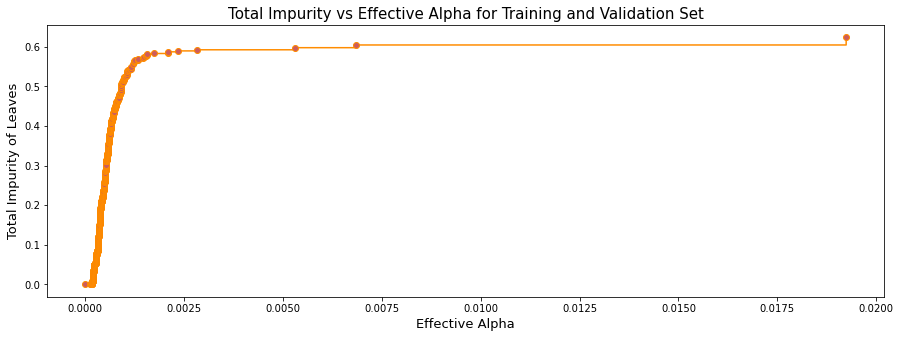

In [60]:
# Find a set of alpha values using base model.
path = tree1.cost_complexity_pruning_path(X_train_val, y_train_val)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post", markerfacecolor='indianred', color='darkorange')
ax.set_xlabel("Effective Alpha", fontsize=13)
ax.set_ylabel("Total Impurity of Leaves", fontsize=13)
ax.set_title("Total Impurity vs Effective Alpha for Training and Validation Set", fontsize=15)

We can also see how the number of nodes and the depth of tree are impacted by having a higher ccp_alpha value.

In [61]:
# Create a list of dts 
dts = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dt.fit(X_train_val, y_train_val)
    dts.append(dt)
print(f"Number of nodes in the last tree is: {dts[-1].tree_.node_count} with ccp_alpha: {ccp_alphas[-1]}")

Number of nodes in the last tree is: 1 with ccp_alpha: 0.044283582158054724


The last value can be removed as it produces a tree with only one node.

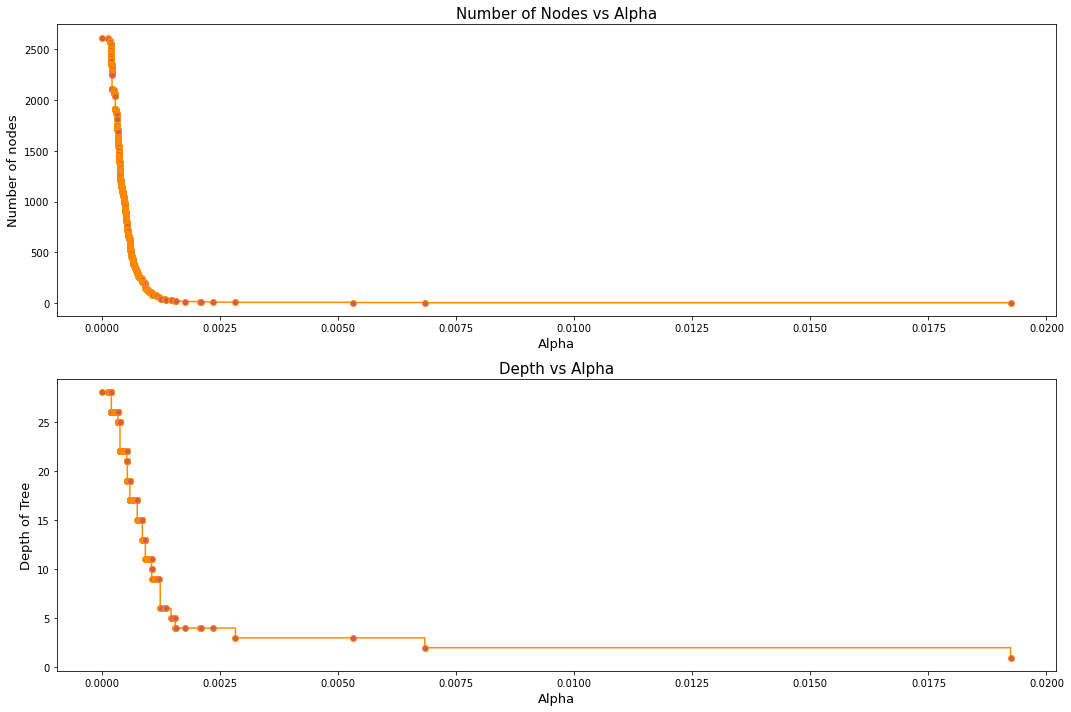

In [62]:
# Depth and number of nodes plots
dts = dts[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [dt.tree_.node_count for dt in dts]
depth = [dt.tree_.max_depth for dt in dts]

fig, ax = plt.subplots(2, 1, figsize=(15, 10))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post", color='darkorange', markerfacecolor='indianred')
ax[0].set_xlabel("Alpha", fontsize=13)
ax[0].set_ylabel("Number of nodes", fontsize=13)
ax[0].set_title("Number of Nodes vs Alpha", fontsize=15)
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post", color='darkorange', markerfacecolor='indianred')
ax[1].set_xlabel("Alpha", fontsize=13)
ax[1].set_ylabel("Depth of Tree", fontsize=13)
ax[1].set_title("Depth vs Alpha", fontsize=15)
fig.tight_layout()

The best ccp_alpha value is the one that maximises the validation score, in our case the f1_weighted score. It is the value just before the score drops. We can visualise this value using the following plots:

In [63]:
# Make a plot of CV scores for different alpha values
cv_scores = []

kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    cv_results = cross_val_score(dt, X_train_val, y_train_val, cv=kfold, scoring='f1_weighted')
    mean_cv_score = cv_results.mean()
    cv_scores.append(mean_cv_score)

# Plot scores and cpp_alpha values
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Ccp_alpha", fontsize=13)
ax.set_ylabel("Mean Cross-Validation Score", fontsize=13)
ax.set_title("Mean CV Score vs 'ccp_alpha' Value Using 5-Fold Cross Validation", fontsize=15)
ax.plot(ccp_alphas, cv_scores, marker='o', label="CV Scores for ccp_alpa Values", drawstyle="steps-post", color='darkorange')
ax.legend()
plt.show()

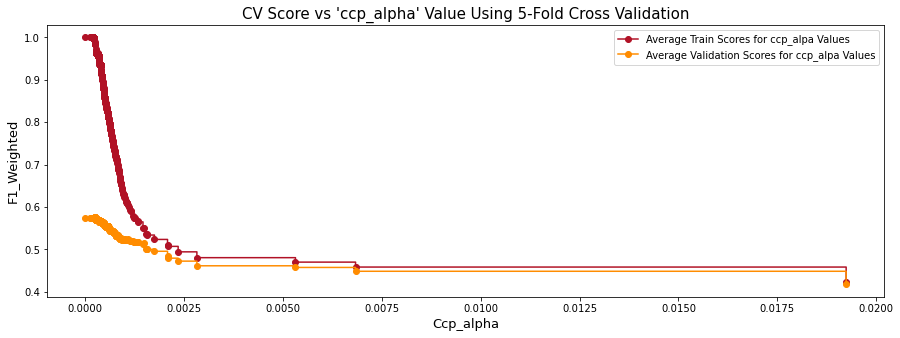

CPU times: user 1min 56s, sys: 997 ms, total: 1min 57s
Wall time: 1min 58s


In [64]:
%%time
# Initialise lists for train and validation scores
cv_train_scores = []
cv_val_scores = []
best_val = 0
best_alpha = 0

# Implement 5-fold stratified cross-validation
kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# For each ccp_alpha value, find mean train and val cross-validation scores
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha) 
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate
    cv_results = cross_validate(dt, X_train_val, y_train_val, 
                                cv=kfold, return_train_score=True, 
                                scoring='f1_weighted')
    # Find the mean train score for dt
    train_score_mean = np.mean(cv_results['train_score'])
    cv_train_scores.append(train_score_mean)
    # Find the mean val score for dt
    val_score_mean = np.mean(cv_results['test_score'])
    cv_val_scores.append(val_score_mean)
    if val_score_mean > best_val:
        best_val = val_score_mean
        best_alpha = ccp_alpha
    
# Plot scores and cpp_alpha values
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Ccp_alpha", fontsize=13)
ax.set_ylabel("F1_Weighted", fontsize=13)
ax.set_title("CV Score vs 'ccp_alpha' Value Using 5-Fold Cross Validation", fontsize=15)
ax.plot(ccp_alphas, cv_train_scores, 
        marker='o', label="Average Train Scores for ccp_alpa Values", drawstyle="steps-post", color='#b11226')
ax.plot(ccp_alphas, cv_val_scores, 
        marker='o', label="Average Validation Scores for ccp_alpa Values", drawstyle="steps-post", color='darkorange')
ax.legend()
plt.show()

In [65]:
# Output the alpha value that maximises the f1_weighted validation score
print(f"The alpha value of {best_alpha} maximises the validation f1_weighted score - {best_val}")

The alpha value of 0.0002512036843207033 maximises the validation f1_weighted score - 0.5761333050833868


We can view this part of the graph more closely to select the maximum ccp_alpha value.

In [66]:
# Initialise lists for train and validation scores
cv_train_scores = []
cv_val_scores = []

# Implement 5-fold stratified cross-validation
kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for ccp_alpha in [best_alpha - (3 * 0.00001), best_alpha - (2 * 0.00001), best_alpha - 0.00001, best_alpha, best_alpha + 0.00001, best_alpha + (2 * 0.00001), best_alpha + (3 * 0.00001), best_alpha + (4 * 0.00001)]:
    dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha) 
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate
    cv_results = cross_validate(dt, X_train_val, y_train_val, 
                                cv=kfold, return_train_score=True, 
                                scoring='f1_weighted')
    # Find the mean train score for dt
    train_score_mean = np.mean(cv_results['train_score'])
    cv_train_scores.append(train_score_mean)
    # Find the mean val score for dt
    val_score_mean = np.mean(cv_results['test_score'])
    cv_val_scores.append(val_score_mean)
    
# Plot scores and cpp_alpha values
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Ccp_alpha", fontsize=13)
ax.set_ylabel("F1_Weighted Score", fontsize=13)
ax.set_title("CV Score vs 'ccp_alpha' Value Using 5-Fold Cross Validation", fontsize=15)
ax.plot([best_alpha - (3 * 0.00001), best_alpha - (2 * 0.00001), best_alpha - 0.00001, best_alpha, best_alpha + 0.00001, best_alpha + (2 * 0.00001), best_alpha + (3 * 0.00001), best_alpha + (4 * 0.00001)],
        cv_train_scores, marker='o', 
        label="Average Train Scores for ccp_alpa Values", drawstyle="steps-post", color='#b11226')

ax.plot([best_alpha - (3 * 0.00001), best_alpha - (2 * 0.00001), best_alpha - 0.00001, best_alpha, best_alpha + 0.00001, best_alpha + (2 * 0.00001), best_alpha + (3 * 0.00001), best_alpha + (4 * 0.00001)],
        cv_val_scores, marker='o', 
        label="Average Validation Scores for ccp_alpa Values", drawstyle="steps-post", color='darkorange')

ax.set_xticks([best_alpha - (3 * 0.00001), best_alpha - (2 * 0.00001), best_alpha - 0.00001, best_alpha, best_alpha + 0.00001, best_alpha + (2 * 0.00001), best_alpha + (3 * 0.00001), best_alpha + (4 * 0.00001)])
ax.legend()

plt.show()

In [67]:
# Manually adjust the best alpha value
best_alpha = 0.000271

Picking the optimal ccp_alpha value tends to decrease overfitting.
We can now re-train the Decion Tree Classifier, check the new score and visualise the tree again.

In [68]:
# Re-fit the tree with best alpha value
dt2 = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha) 

cv_results3 = cross_validate(dt2, X_train_val, y_train_val, 
                            cv=kfold, return_train_score=True, 
                            scoring='f1_weighted')

# Find the mean train score for dt
train_score_mean3 = np.mean(cv_results3['train_score'])
# Find the mean val score for dt
val_score_mean3 = np.mean(cv_results3['test_score'])

print('Mean Train Score: {}'.format(train_score_mean3))
print('Mean Validation Score: {}'.format(val_score_mean3))

Mean Train Score: 0.9643335344236681
Mean Validation Score: 0.5706006472346368


In [69]:
# Export the pruned tree
dot_data = export_graphviz(dt2.fit(X_train_val, y_train_val), out_file=None,
                           filled=True, rounded=True,  
                           special_characters=True, 
                           feature_names=col_names_X,
                           class_names=target_names) 
graph = graphviz.Source(dot_data) 
graph.render("tree2",view = True)

# This has been outputted to the file tree2.pdf

'tree2.pdf'

It can also be visualised in text format:

In [70]:
# Output tree in text format
dt2.fit(X_train_val, y_train_val)
r = export_text(dt2, feature_names=col_names_X)
print(r)

|--- alcohol <= 0.22
|   |--- volatile acidity <= -0.62
|   |   |--- alcohol <= -1.46
|   |   |   |--- fixed acidity <= 0.07
|   |   |   |   |--- free sulfur dioxide <= -0.09
|   |   |   |   |   |--- citric acid <= -0.06
|   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |--- citric acid >  -0.06
|   |   |   |   |   |   |--- class: 7
|   |   |   |   |--- free sulfur dioxide >  -0.09
|   |   |   |   |   |--- volatile acidity <= -1.10
|   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |--- volatile acidity >  -1.10
|   |   |   |   |   |   |--- class: 6
|   |   |   |--- fixed acidity >  0.07
|   |   |   |   |--- citric acid <= 0.84
|   |   |   |   |   |--- class: 7
|   |   |   |   |--- citric acid >  0.84
|   |   |   |   |   |--- class: 8
|   |   |--- alcohol >  -1.46
|   |   |   |--- sulphates <= -0.38
|   |   |   |   |--- chlorides <= -0.76
|   |   |   |   |   |--- sulphates <= -0.51
|   |   |   |   |   |   |--- free sulfur dioxide <= -0.81
|   |   |   |   |   |   |   |---

#### Further Tuning

Having found the best ccp_alpha, we can now tune the rest of the hyperparameters. The Grid Search is used to look at all combinations of parameters to find the ones that maximise the f1_weighted score.

In [71]:
%%time
# https://www.mygreatlearning.com/blog/gridsearchcv/
# Use grid search to further optimise DT
try:

  # Defining parameter range 
    param_grid = {'criterion': ['entropy', 'gini'],  
                'min_samples_leaf': [1, 2, 5],
                'min_samples_split': [2, 3, 5]}  
    
    grid = GridSearchCV(DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=0), param_grid, refit = True, verbose = 3, n_jobs=-1, scoring='f1_weighted', cv=5)
    
    # Fitting the model for grid search 
    grid.fit(X_train_val, y_train_val) 
  
    # # Output mean validation score for each combination of parameters 
    # means = grid.cv_results_['mean_test_score']
    # parameters = grid.cv_results_['params']
    # for mean, parameter in zip(means, parameters):
    #   print(f"The mean f1_weighted score for {parameter} is {mean}") 

    # # Print best parameter after tuning 
    print(f"\nBest parameters to use:\n{grid.best_params_}\n") 

except Exception:
    print(traceback.format_exc())

Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best parameters to use:
{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2}

CPU times: user 267 ms, sys: 176 ms, total: 443 ms
Wall time: 3.79 s


### Perceptron

In [72]:
%%time
# Fit the initial Perceptron and output some metrics
ppn = Perceptron(random_state=0) 

cv_results = cross_validate(ppn, X_train_val, y_train_val, 
                             cv=kfold, return_train_score=True, 
                             scoring='f1_weighted')

# Find the mean train score
train_score_mean = np.mean(cv_results['train_score'])
# Find the mean val score
val_score_mean = np.mean(cv_results['test_score'])

print('Mean Train Score: {}'.format(train_score_mean))
print('Mean Validation Score: {}'.format(val_score_mean))

Mean Train Score: 0.4136761881998085
Mean Validation Score: 0.3954027980367264
CPU times: user 410 ms, sys: 22.8 ms, total: 433 ms
Wall time: 149 ms


In [73]:
%%time
# https://www.mygreatlearning.com/blog/gridsearchcv/
# Use grid search to optimise MLP
try:

    # Defining parameter range 
    param_grid = {'eta0': [0.0001, 0.001, 0.01, 0.1, 1.0],  
                'max_iter': [1, 10, 100, 1000, 10000]}  
    
    grid = GridSearchCV(Perceptron(), param_grid, refit = True, verbose = 3, n_jobs=-1, scoring='f1_weighted', cv=5)
    
    # Fitting the model for grid search 
    grid.fit(X_train_val, y_train_val) 

    # # Output mean validation score for each combination of parameters 
    # means = grid.cv_results_['mean_test_score']
    # parameters = grid.cv_results_['params']
    # for mean, parameter in zip(means, parameters):
    #   print(f"The mean f1_weighted score for {parameter} is {mean}")
  
    # # Print best parameter after tuning 
    print(f"\nBest parameters to use:\n{grid.best_params_}\n") 

except Exception:
    print(traceback.format_exc())

Fitting 5 folds for each of 25 candidates, totalling 125 fits

Best parameters to use:
{'eta0': 0.0001, 'max_iter': 1}

CPU times: user 233 ms, sys: 31.4 ms, total: 265 ms
Wall time: 750 ms


### Multi-Layer Perceptron

The MLP model is optimised using the Random Search because of the number of combinations. Using the Grid Search would be impractical because of the amount of time it takes to look through all combinations.

In [74]:
%%time
# Fit the initial MLP and output some metrics
# Initializing the classifier
mlp = MLPClassifier(random_state=0) 

cv_results = cross_validate(mlp, X_train_val, y_train_val, 
                             cv=kfold, return_train_score=True, 
                             scoring='f1_weighted')

# Find the mean train score
train_score_mean = np.mean(cv_results['train_score'])
# Find the mean val score
val_score_mean = np.mean(cv_results['test_score'])

print('Mean Train Score: {}'.format(train_score_mean))
print('Mean Validation Score: {}'.format(val_score_mean))

Mean Train Score: 0.6069966241647679
Mean Validation Score: 0.545443349727454
CPU times: user 57.8 s, sys: 944 ms, total: 58.7 s
Wall time: 16.1 s


In [75]:
%%time
# https://www.mygreatlearning.com/blog/gridsearchcv/

# Use random search to optimise MLP
try:

    # Defining parameter range 
    param_grid = {'solver': ['sgd', 'adam', 'ibfgs'],  
                'hidden_layer_sizes': [(5,), (10,), (50,), (100,), (5,5), (10,10), (50,50), (10,5), (50,10)],
                'max_iter': [10, 100, 300, 500, 1000, 5000],
                'learning_rate': ['constant', 'invscaling'], 
                'momentum':[0.9, 0.5, 0.1],
                'nesterovs_momentum': [True, False],
                'learning_rate_init': [0.001, 0.01, 0.1],
                'activation': ['relu', 'logistic', 'tanh']}
    
    grid = RandomizedSearchCV(MLPClassifier(random_state=0), param_grid, refit = True, verbose = 3, n_jobs=-1, scoring='f1_weighted', cv=5, random_state=0, n_iter=300)
    
    # Fitting the model for grid search 
    grid.fit(X_train_val, y_train_val) 

    # # Output mean validation score for each combination of parameters 
    # means = grid.cv_results_['mean_test_score']
    # parameters = grid.cv_results_['params']
    # for mean, parameter in zip(means, parameters):
    #   print(f"The mean f1_weighted score for {parameter} is {mean}")
  
    # # Print best parameter after tuning 
    print(f"\nBest parameters to use:\n{grid.best_params_}\n") 

except Exception:
    print(traceback.format_exc())

Fitting 5 folds for each of 300 candidates, totalling 1500 fits

Best parameters to use:
{'solver': 'adam', 'nesterovs_momentum': True, 'momentum': 0.9, 'max_iter': 1000, 'learning_rate_init': 0.01, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (50, 50), 'activation': 'logistic'}

CPU times: user 53.1 s, sys: 1.26 s, total: 54.4 s
Wall time: 13min 19s


### Naïve Bayes Classifier

In [76]:
%%time
# Fit the initial NB and output some metrics
# Initializing the classifier
gnb = GaussianNB()

cv_results = cross_validate(gnb, X_train_val, y_train_val, 
                             cv=kfold, return_train_score=True, 
                             scoring='f1_weighted')

# Find the mean train score
train_score_mean = np.mean(cv_results['train_score'])
# Find the mean val score 
val_score_mean = np.mean(cv_results['test_score'])

print('Mean Train Score: {}'.format(train_score_mean))
print('Mean Validation Score: {}'.format(val_score_mean))

Mean Train Score: 0.4898215308060146
Mean Validation Score: 0.4832284090842117
CPU times: user 229 ms, sys: 5.98 ms, total: 235 ms
Wall time: 60 ms


In [77]:
%%time
# Use grid search to optimise NB
try:

    # Defining parameter range 
    # https://stackoverflow.com/questions/39828535/how-to-tune-gaussiannb
    param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
    
    grid = GridSearchCV(GaussianNB(), param_grid, refit = True, verbose = 3, n_jobs=-1, scoring='f1_weighted', cv=5)
    
    # fitting the model for grid search 
    grid.fit(X_train_val, y_train_val) 

    # # Output mean validation score for each combination of parameters 
    # means = grid.cv_results_['mean_test_score']
    # parameters = grid.cv_results_['params']
    # for mean, parameter in zip(means, parameters):
    #   print(f"The mean f1_weighted score for {parameter} is {mean}")
  
    # # Print best parameter after tuning 
    print(f"\nBest parameters to use:\n{grid.best_params_}\n")  

except Exception:
    print(traceback.format_exc())

Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best parameters to use:
{'var_smoothing': 0.04328761281083057}

CPU times: user 605 ms, sys: 77 ms, total: 682 ms
Wall time: 1.51 s


## Training With Best Parameters <a class="anchor" id="best_params"></a>

Having found the best parameters, we can now compare the re-train each model and make some final comparisons. Confusion matrices, as well as the classification report, f1_weighted score and the number of misclassified examples for each algorithm can be seen below.


Fitting a Decision Tree model using the optimal hyperparameters


Accuracy score for test data: 0.6158995815899582

F1_Weighted score for training data: 1.0

Classification Report for training data:
               precision    recall  f1-score   support

           4       1.00      1.00      1.00       147
           5       1.00      1.00      1.00      1562
           6       1.00      1.00      1.00      2102
           7       1.00      1.00      1.00       819
           8       1.00      1.00      1.00       147

    accuracy                           1.00      4777
   macro avg       1.00      1.00      1.00      4777
weighted avg       1.00      1.00      1.00      4777


Confusion Matrix of training data:
[[ 147    0    0    0    0]
 [   0 1562    0    0    0]
 [   0    0 2102    0    0]
 [   0    0    0  819    0]
 [   0    0    0    0  147]]

Number of training examples: 4777
Missclassified training examples: 0

Accuracy score for test data: 0.6158995815899582

F1_Weighted

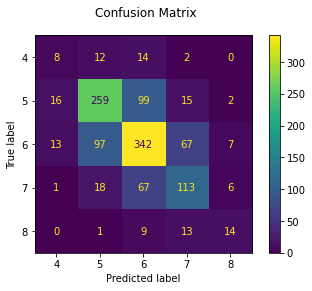

----------------------------------------------------------------------

Fitting a Gaussian Naive Bayes model using the optimal hyperparameters


Accuracy score for test data: 0.49456066945606697

F1_Weighted score for training data: 0.49195478200415527

Classification Report for training data:
               precision    recall  f1-score   support

           4       0.06      0.01      0.01       147
           5       0.55      0.52      0.53      1562
           6       0.51      0.60      0.55      2102
           7       0.44      0.43      0.43       819
           8       0.00      0.00      0.00       147

    accuracy                           0.51      4777
   macro avg       0.31      0.31      0.31      4777
weighted avg       0.48      0.51      0.49      4777


Confusion Matrix of training data:
[[   1   78   60    8    0]
 [   5  813  703   41    0]
 [   9  501 1260  332    0]
 [   2   75  389  353    0]
 [   0   13   63   71    0]]

Number of training examples: 4777
Mis

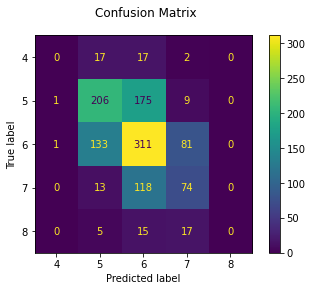

----------------------------------------------------------------------

Fitting a Perceptron model using the optimal hyperparameters


Accuracy score for test data: 0.3623430962343096

F1_Weighted score for training data: 0.35780029695997734

Classification Report for training data:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00       147
           5       0.50      0.39      0.44      1562
           6       0.43      0.28      0.34      2102
           7       0.26      0.58      0.36       819
           8       0.07      0.18      0.10       147

    accuracy                           0.36      4777
   macro avg       0.25      0.29      0.25      4777
weighted avg       0.40      0.36      0.36      4777


Confusion Matrix of training data:
[[  0  78  32  36   1]
 [  1 606 582 325  48]
 [  2 453 594 896 157]
 [  0  72 152 477 118]
 [  0   2  27  92  26]]

Number of training examples: 4777
Missclassified training examples: 3074


----------------------------------------------------------------------

Fitting a MLP model using the optimal hyperparameters


Accuracy score for test data: 0.599163179916318

F1_Weighted score for training data: 0.9826247650378841

Classification Report for training data:
               precision    recall  f1-score   support

           4       0.98      0.98      0.98       147
           5       0.99      0.98      0.98      1562
           6       0.98      0.99      0.98      2102
           7       0.99      0.98      0.98       819
           8       0.99      0.97      0.98       147

    accuracy                           0.98      4777
   macro avg       0.98      0.98      0.98      4777
weighted avg       0.98      0.98      0.98      4777


Confusion Matrix of training data:
[[ 144    1    2    0    0]
 [   3 1533   24    1    1]
 [   0   21 2076    4    1]
 [   0    0   20  799    0]
 [   0    1    2    2  142]]

Number of training examples: 4777
Missclassified training

----------------------------------------------------------------------
CPU times: user 48.5 s, sys: 770 ms, total: 49.2 s
Wall time: 13.2 s


In [78]:
%%time
# Fit the models with optimal parameters and plot for final comparisons
models = []
models.append(('Decision Tree', DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha, criterion='entropy', min_samples_leaf=1, min_samples_split=2)))
models.append(('Gaussian Naive Bayes', GaussianNB(var_smoothing=0.04328761281083057)))
models.append(('Perceptron', Perceptron(random_state=0, eta0=0.0001, max_iter=1)))
models.append(('MLP', MLPClassifier(random_state=0, solver='adam', nesterovs_momentum=True, momentum=0.9, max_iter=1000, learning_rate_init=0.01, learning_rate='invscaling', hidden_layer_sizes=(50, 50), activation='logistic')))

for name, model in models: 
    print(f"\nFitting a {name} model using the optimal hyperparameters\n")
    model.fit(X_train_val, y_train_val)

    # Training prediction
    train_pred = model.predict(X_train_val)

    # Test prediction
    test_pred = model.predict(X_test) 

    # Print classification report 
    print(f"\nAccuracy score for test data: {accuracy_score(y_true=y_test, y_pred=test_pred)}")
    print(f"\nF1_Weighted score for training data: {f1_score(y_true=y_train_val, y_pred=train_pred, average='weighted')}\n")
    print(f"Classification Report for training data:\n {classification_report(y_true=y_train_val, y_pred=train_pred)}\n") 
    print(f"Confusion Matrix of training data:\n{confusion_matrix(y_true=y_train_val, y_pred=train_pred)}\n")

    print(f"Number of training examples: {len(y_train_val)}")
    print(f"Missclassified training examples: {(y_train_val != train_pred).sum()}")

    print(f"\nAccuracy score for test data: {accuracy_score(y_true=y_test, y_pred=test_pred)}")
    print(f"\nF1_Weighted score for test data: {f1_score(y_true=y_test, y_pred=test_pred, average='weighted')}\n")
    print(f"Classification Report for test data:\n {classification_report(y_true=y_test, y_pred=test_pred)}\n") 
    print(f"Confusion Matrix of test data:\n{confusion_matrix(y_true=y_test, y_pred=test_pred)}\n")

    print(f"Number of test examples: {len(y_test)}")
    print(f"Missclassified test examples: {(y_test != test_pred).sum()}\n")

    mtrx = metrics.plot_confusion_matrix(model, X_test, y_test, values_format = '.5g')
    mtrx.figure_.suptitle("Confusion Matrix")
    plt.show()

    print(70*"-")

## ROC Curves and Other Comparisons <a class="anchor" id="comparisons"></a>

It is also possible to plot the ROCs curve to compare the performance of algorithms for different classes as well as to compare the algorithms. 

In order to do so, target values have to be binarised first:

In [79]:
# Binarise the output
y_test_bin = label_binarize(y_test, sorted(y_test.unique()))
# y_test_bin[0:15]
y_train_bin = label_binarize(y_train_val, sorted(y_train_val.unique()))
y_train_bin[0:15]

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]])

In [80]:
# Check that the binarisation is correct
len(y_train_val.unique())

5


 ************************* Decision Tree ************************* 



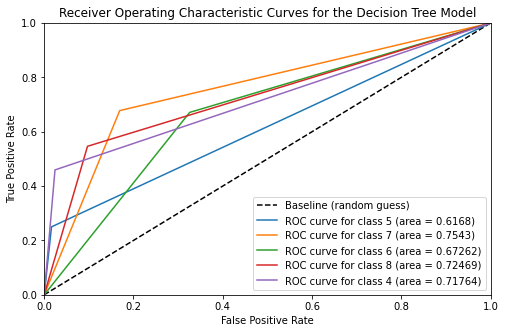


 ************************* Gaussian Naive Bayes ************************* 



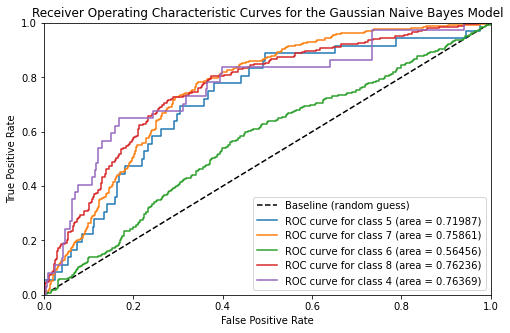


 ************************* Perceptron ************************* 




 ************************* MLP ************************* 



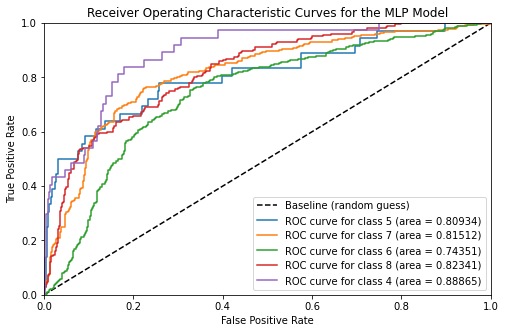

In [81]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
# https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification

# Output ROCs for each class and each model

y_test_bin = label_binarize(y_test, sorted(y_test.unique()))
y_train_bin = label_binarize(y_train_val, sorted(y_train_val.unique()))

n_classes = len(y_train_val.unique())
classes = y_train_val.unique()

for name, model in models: 
    if name != "Perceptron" and name != "SVM": # Perceptron does not have predict_proba and SVM needs probability = True
  
        print("\n", 25*"*", name, 25*"*","\n")

        fig, ax = plt.subplots(figsize=(8, 5))
        ax.plot([0, 1], [0, 1], 'k--', label='Baseline (random guess)')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.0])
        ax.set_xlabel("False Positive Rate")
        ax.set_ylabel("True Positive Rate")
        ax.set_title(f"Receiver Operating Characteristic Curves for the {name} Model")
        # sns.despine()

        # Classifier
        clf = OneVsRestClassifier(model)
        y_score = clf.fit(X_train_val, y_train_bin).predict_proba(X_test) 

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot of a ROC curve for a specific class
        for i in range(n_classes):
            ax.plot(fpr[i], tpr[i], label=f"ROC curve for class {classes[i]} (area = {round(roc_auc[i], 5)})")
            ax.legend(loc="lower right")

        plt.show()
    
    else:
        print("\n", 25*"*", name, 25*"*","\n")

        fig, ax = plt.subplots(figsize=(8, 5))
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.0])
        ax.set_xlabel("False Positive Rate")
        ax.set_ylabel("True Positive Rate")
        ax.set_title(f"Receiver Operating Characteristic Curves for the {name} Model")
        # sns.despine()

        # Classifier
        clf = OneVsRestClassifier(model) 
        y_score = clf.fit(X_train_val, y_train_bin).decision_function(X_test) 

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot of a ROC curve for every class class
        for i in range(n_classes):
            ax.plot(fpr[i], tpr[i], label=f"ROC curve for class {classes[i]} (area = {round(roc_auc[i], 5)})")
            ax.legend(loc="lower right")

        plt.show()

It looks the Decision Tree was struggling to differentiate class 5, hence producing many false positives and negatives. Therefore it has the lowest AUC.

Other algorithms found it difficult to differentiate the majority class - quality 6. Perceptron failed to differentiate it at all, thus the ROC is on the diagonal. Overall, most algorithms are better than random guessing. In order to compare them, we can take the ROC curve for the most represented class - 6 - from each algorithm and plot them on the same graph. 

We can create a table where the scores will be stored:

In [82]:
# Create a table for results
columns = ["Metric"] + [name for name, model in models]
results_table = pd.DataFrame(columns = columns)

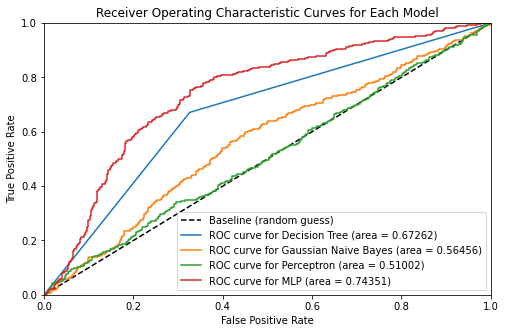

In [83]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
# https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification

# Plot ROCs for all models to compare performance between them (for classifying quality 6 for simplicity)
y_test_bin = label_binarize(y_test, sorted(y_test.unique()))
y_train_bin = label_binarize(y_train_val, sorted(y_train_val.unique()))

n_classes = len(y_train_val.unique())
classes = y_train_val.unique()

plt.figure(figsize=(8, 5))
plt.plot([0, 1], [0, 1], 'k--', label='Baseline (random guess)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

results_table.loc[0,'Metric'] = 'AUC'

for name, model in models: 
    if name != "Perceptron": # Perceptron does not have predict_proba

        # Classifier
        clf = OneVsRestClassifier(model)
        y_score = clf.fit(X_train_val, y_train_bin).predict_proba(X_test) 

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            if i == 2:
                fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
                roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot of a ROC curve for a specific class
        for i in range(n_classes):
            if i == 2:
                plt.plot(fpr[i], tpr[i], label=f"ROC curve for {name} (area = {round(roc_auc[i], 5)})")
                results_table.loc[0, name] = round(roc_auc[i], 5)
    
    else:

        # Classifier
        clf = OneVsRestClassifier(model) 
        y_score = clf.fit(X_train_val, y_train_bin).decision_function(X_test) 

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            if i == 2:
                fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
                roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot of a ROC curve for every class class
        for i in range(n_classes):
            if i == 2:
                plt.plot(fpr[i], tpr[i], label=f"ROC curve for {name} (area = {round(roc_auc[i], 5)})")
                results_table.loc[0, name] = round(roc_auc[i], 5)

plt.title(f"Receiver Operating Characteristic Curves for Each Model", )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.show()

The MLP is the best algorithm judging by its ability to predict class 6 with fewest false positives and false negatives. We can also do the stratified k-fold split and produce the boxplots for accuracy and f1_weighted scores for each algorithm.

In [84]:
# Evaluate each model in turn using accuracy
results = []
names = []
results_table.loc[1,'Metric'] = 'Accuracy'

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle = True, random_state=1)
    cv_results = cross_val_score(model, X_train_val, y_train_val, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    average_score = np.mean(cv_results)
    results_table.loc[1, name] = average_score
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
plt.figure(figsize=(8, 6))

plot = sns.boxplot(data=results)
plot.set_title("5-Fold Cross-Validation - Model Comparison")
plot.set_xticks(range(len(names)))
plot.set_xticklabels(names)
plot.set(ylabel="Accuracy")

plt.show()

Decision Tree: 0.577139 (0.009270)
Gaussian Naive Bayes: 0.501566 (0.011080)
Perceptron: 0.407586 (0.033683)
MLP: 0.598915 (0.017211)


In [85]:
# Evaluate each model in turn using f1_weighted
results = []
names = []
results_table.loc[2,'Metric'] = 'F1_Weighted'

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle = True, random_state=1)
    cv_results = cross_val_score(model, X_train_val, y_train_val, cv=kfold, scoring='f1_weighted')
    results.append(cv_results)
    names.append(name)
    average_score = np.mean(cv_results)
    results_table.loc[2, name] = average_score
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
plt.figure(figsize=(8, 6))

plot = sns.boxplot(data=results)
plot.set_title("5-Fold Cross-Validation - Model Comparison")
plot.set_xticks(range(len(names)))
plot.set_xticklabels(names)
plot.set(ylabel="F1_Weighted Score")

plt.show()

Decision Tree: 0.577094 (0.009939)
Gaussian Naive Bayes: 0.485407 (0.011520)
Perceptron: 0.394981 (0.031084)
MLP: 0.597054 (0.016759)


All plots show that MLP is the best algorithm to use with this dataset, closely followed by the Decision Trees. The overall results can be viewed in the table below:

In [86]:
# Output the results table
results_table

Metric Decision Tree Gaussian Naive Bayes Perceptron       MLP
0          AUC       0.67262              0.56456    0.51002   0.74351
1     Accuracy      0.577139             0.501566   0.407586  0.598915
2  F1_Weighted      0.577094             0.485407   0.394981  0.597054